In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from matplotlib.gridspec import GridSpec


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/'
x1ds = np.hstack((glob.glob('{}/*x1d.fits'.format(path)), glob.glob('{}/*sx1.fits'.format(path))))
x1ds

array(['/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44040_sx1.fits'],
      dtype='<U67')

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44010_x1d.fits
G140L
[513.3294]


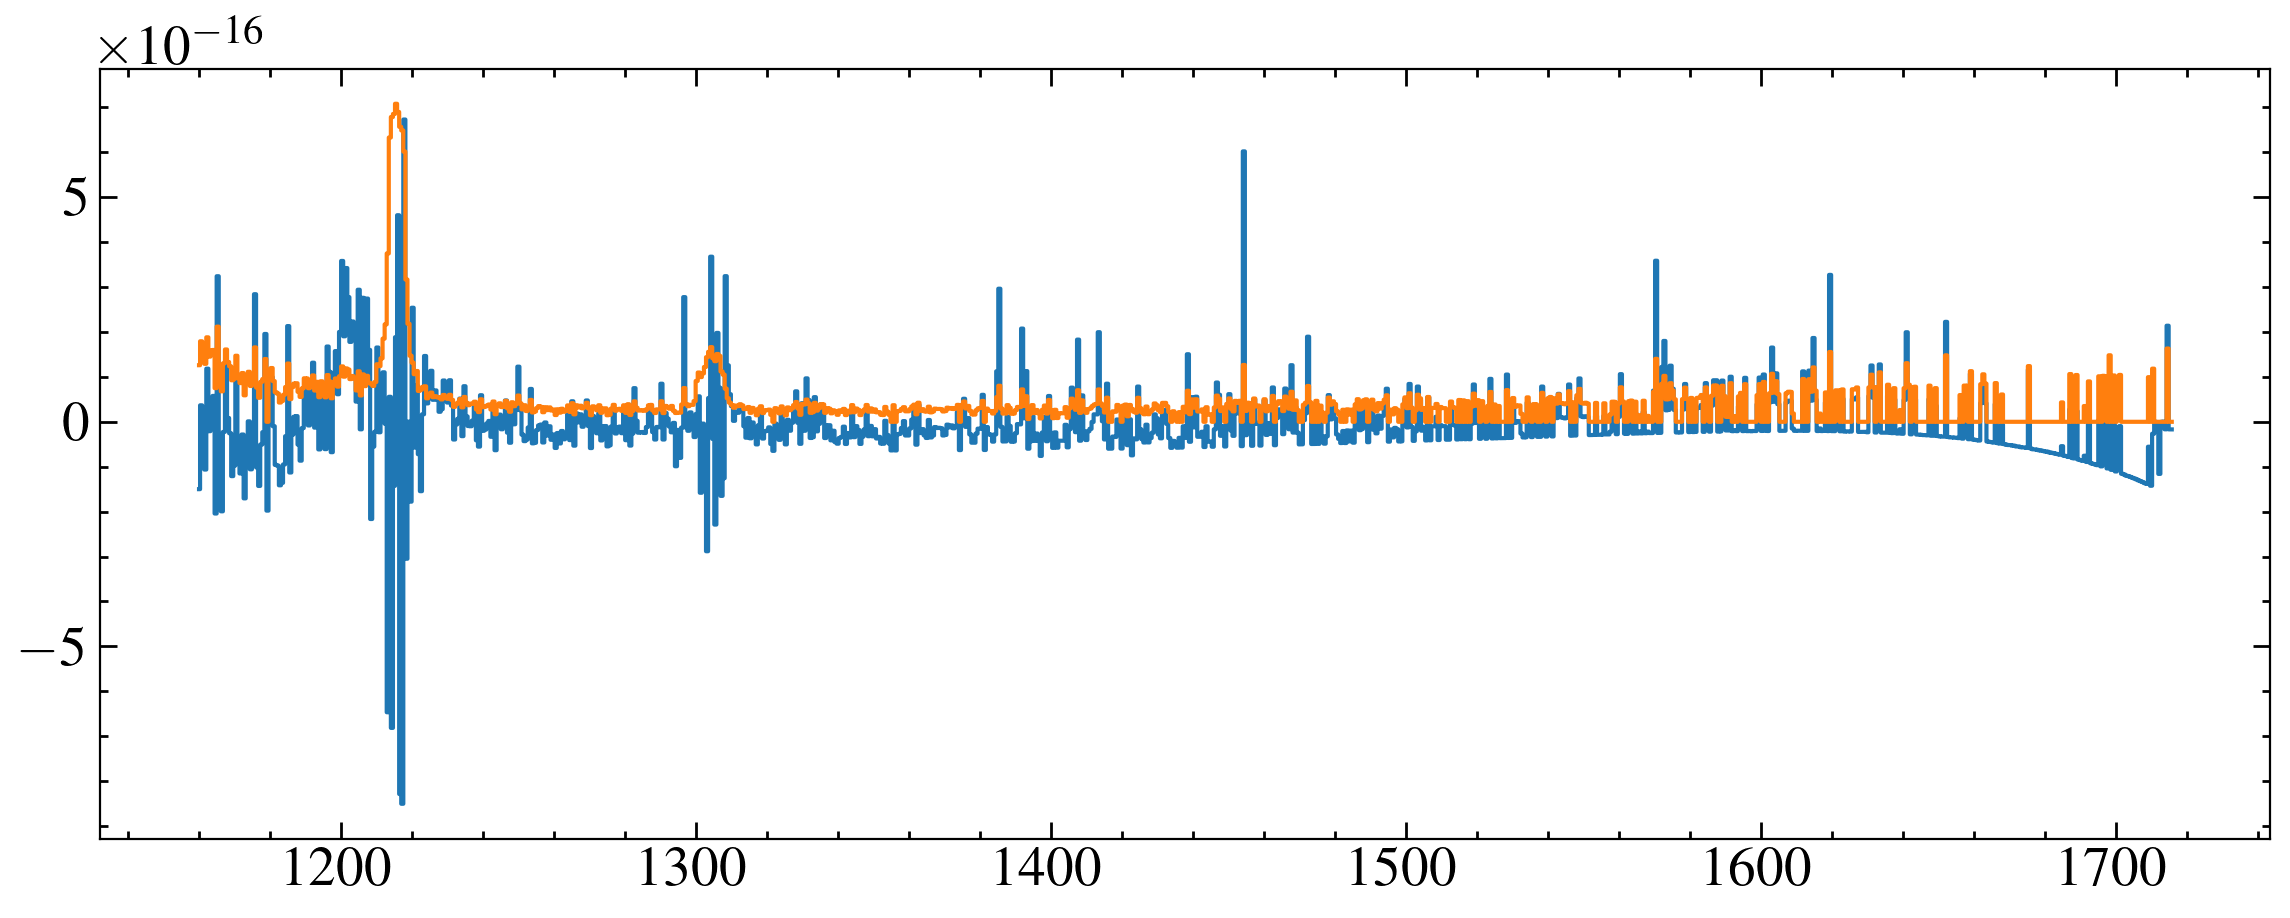

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44020_x1d.fits
G140L
[511.43042]


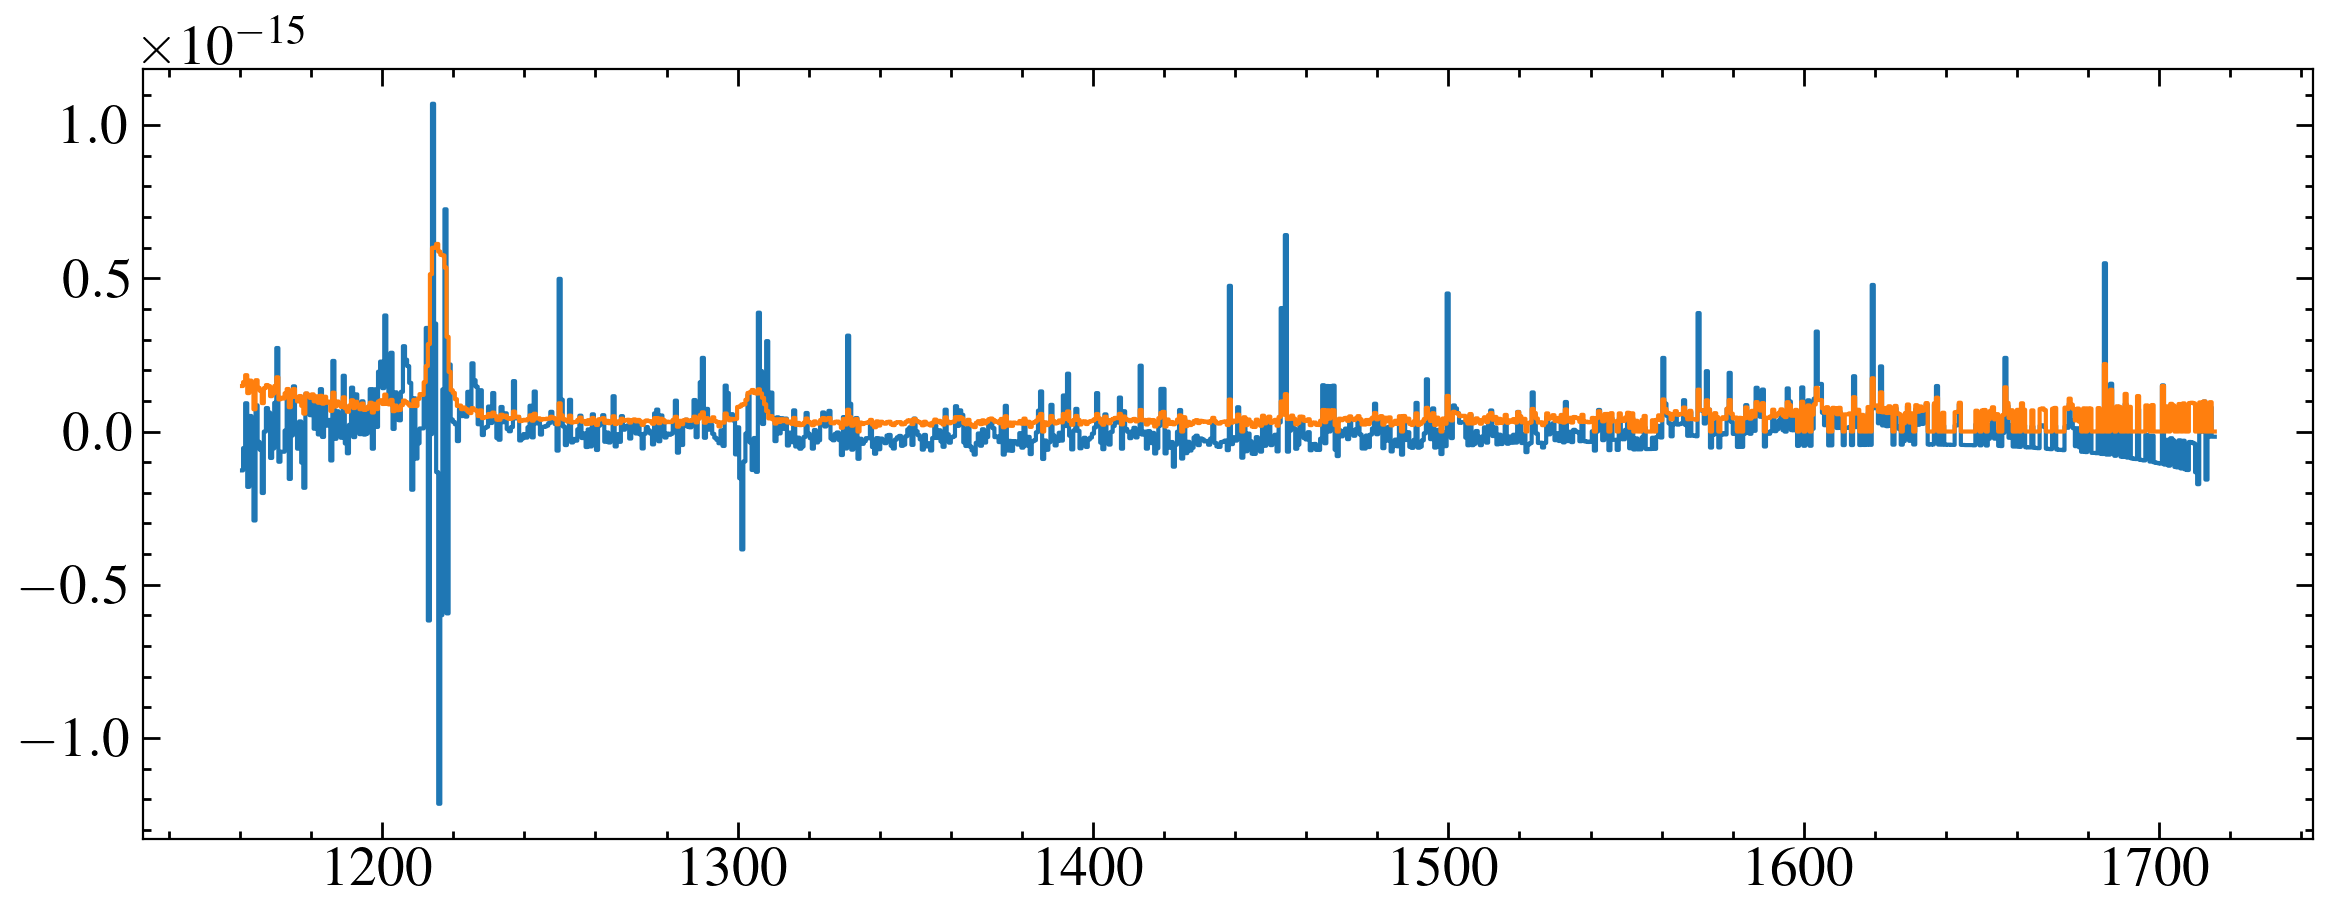

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44030_x1d.fits
G230L
[498.7415]


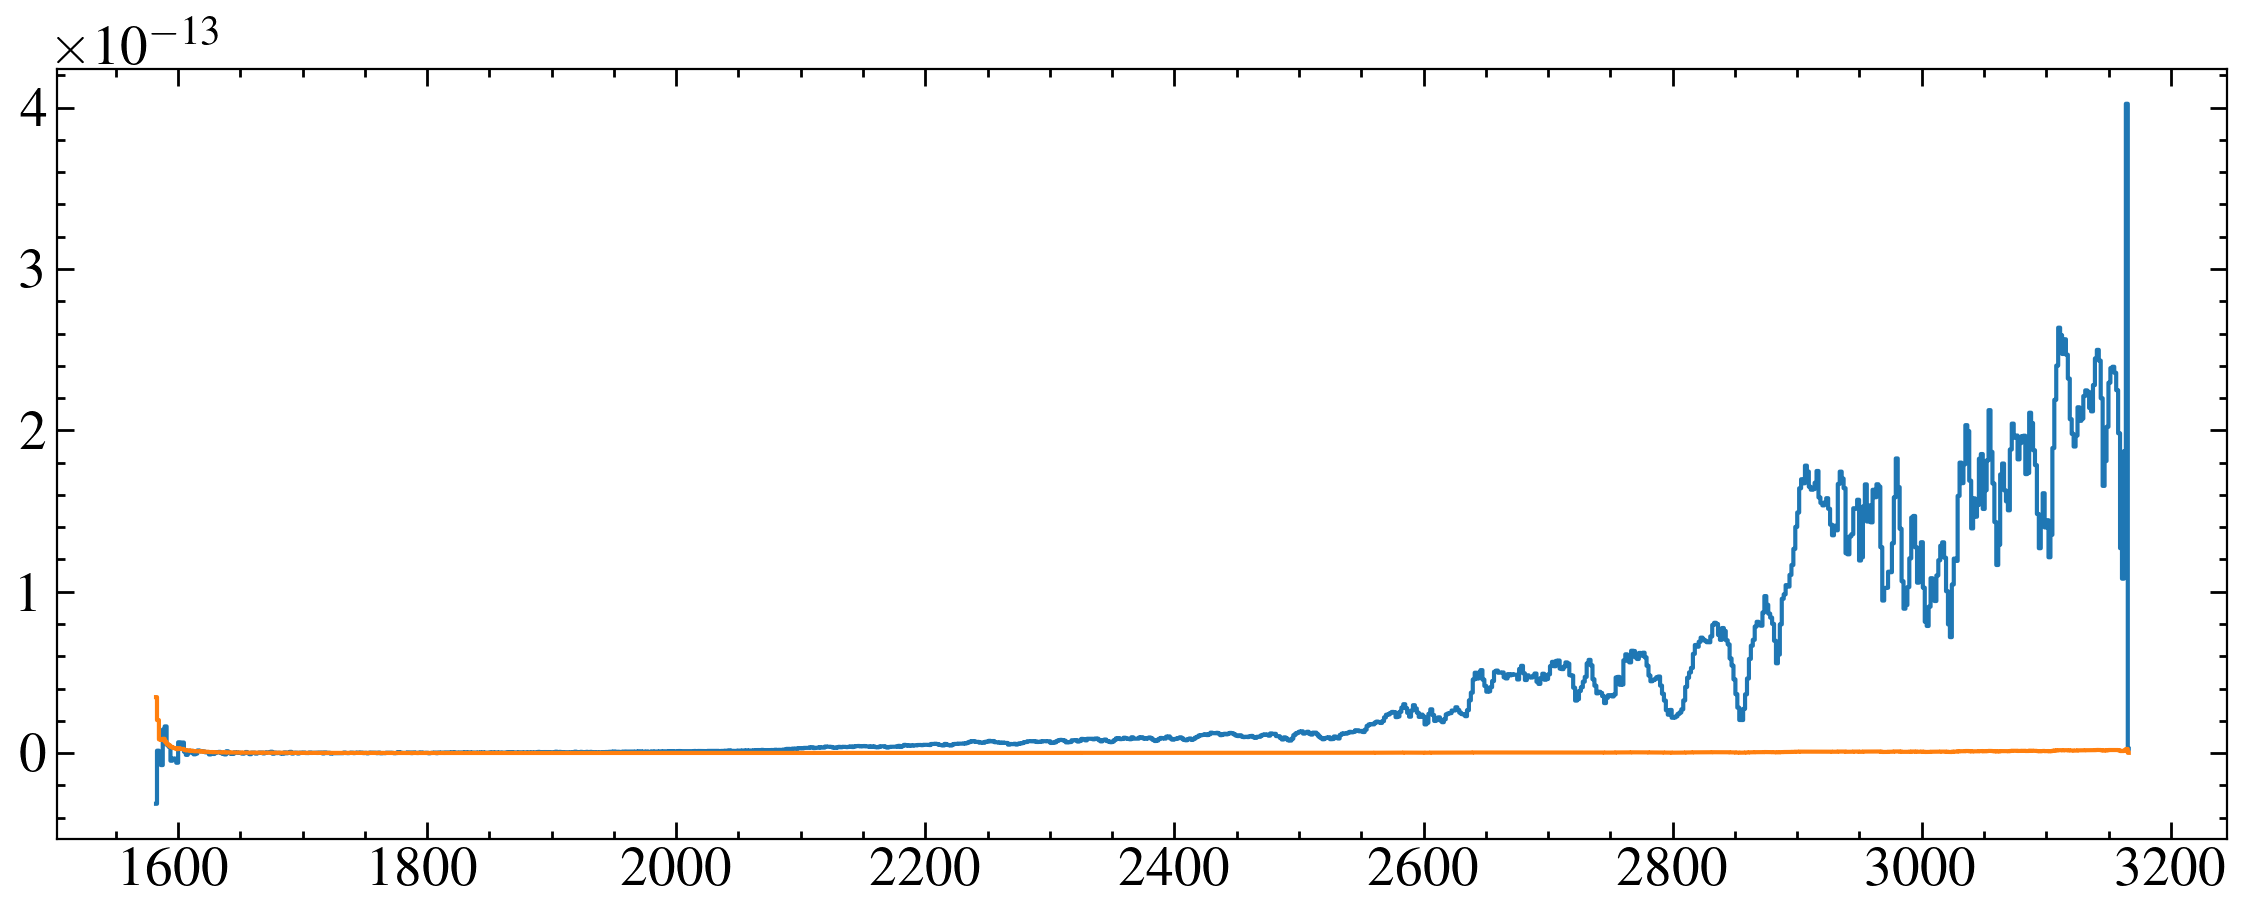

/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44040_sx1.fits
G430L
[894.887]


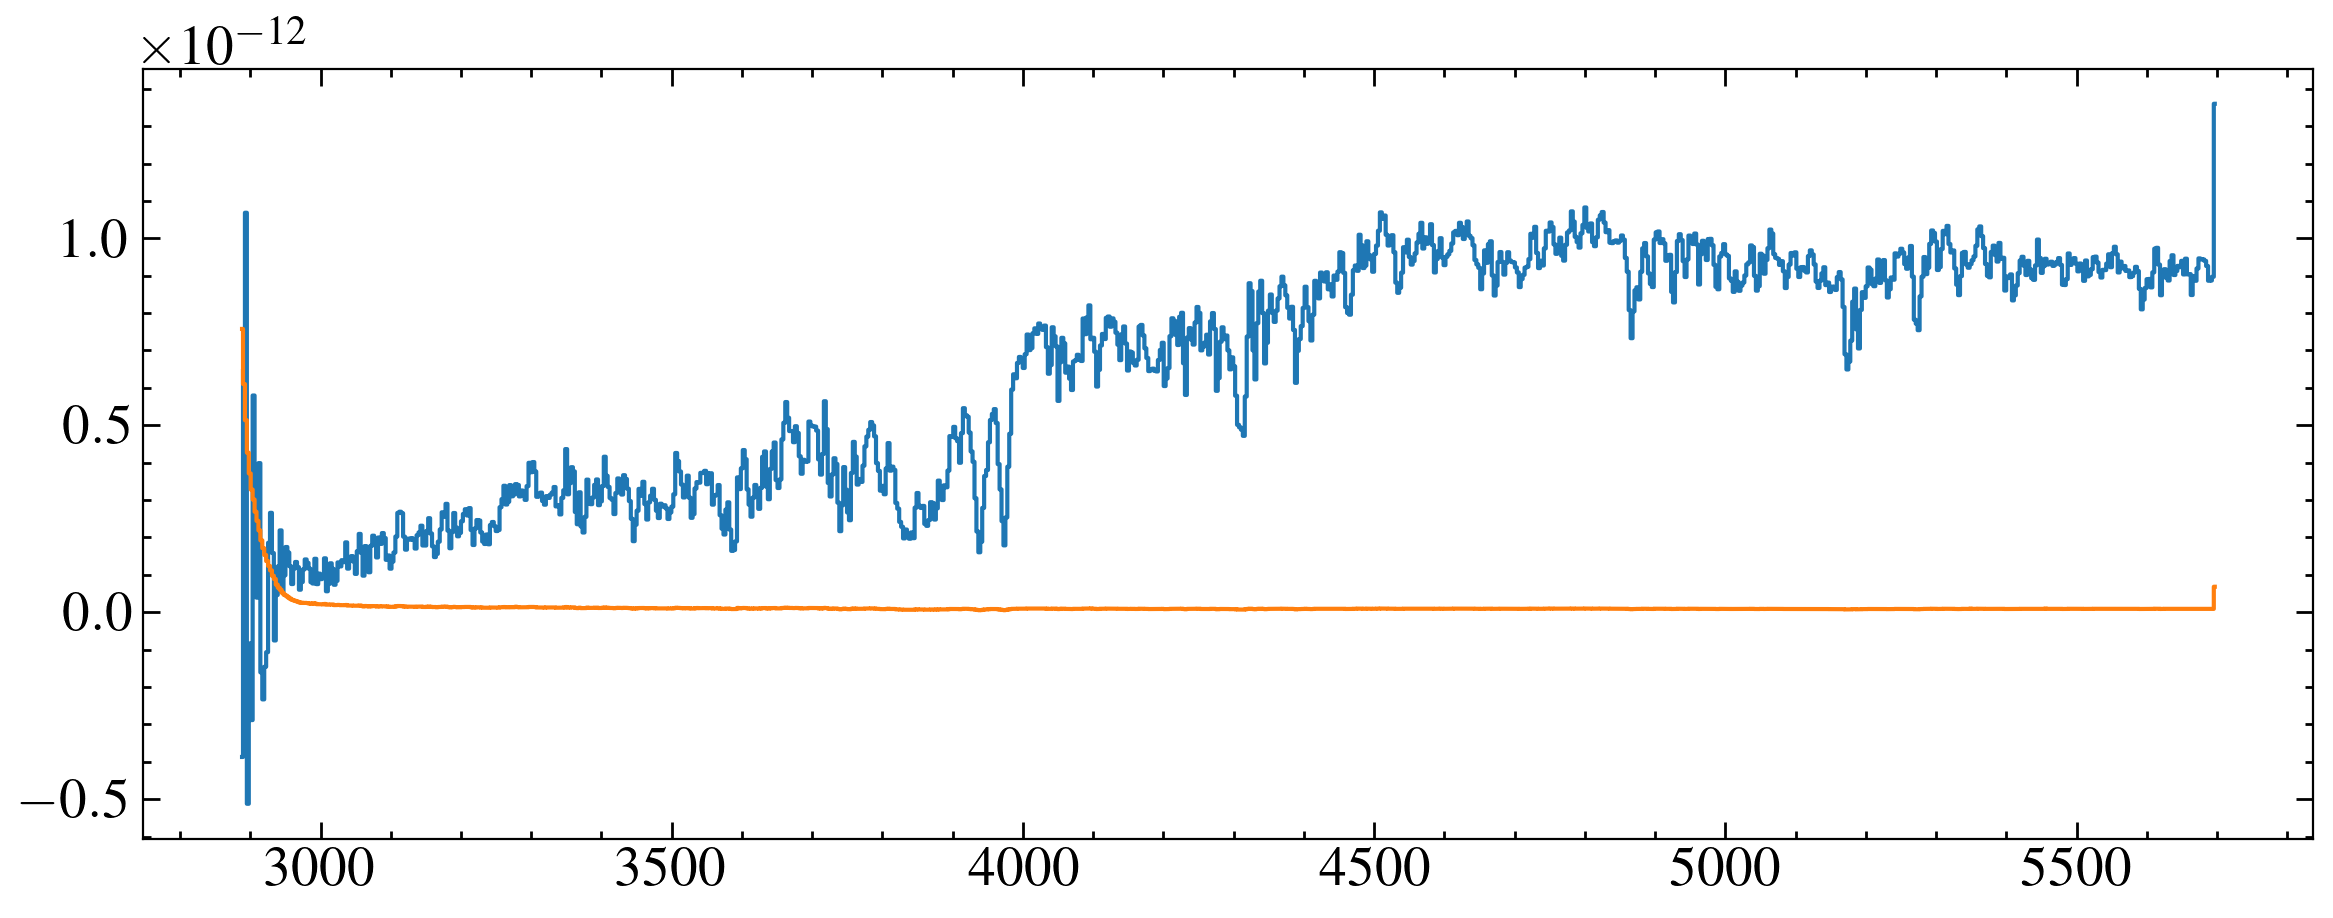

In [3]:
for x in x1ds:
    print(x)
    print(fits.getheader(x, 0)['OPT_ELEM'])
    data = fits.getdata(x, 1)
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    mask = w > 1160
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid', c='C0')
    plt.step(w, e, where='mid', c='C1')
    plt.show()


G140L data is not great...

In [4]:
import stistools
os.environ['oref'] = path

The following tasks in the stistools package can be run with TEAL:
   basic2d      calstis     ocrreject     wavecal        x1d          x2d


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/nmpfit.py:8: UserWarning: NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.
  warnings.warn("NMPFIT is deprecated - stsci.tools v 3.5 is the last version to contain it.")
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/stsci/tools/gfit.py:18: UserWarning: GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it.Use astropy.modeling instead.
  warnings.warn("GFIT is deprecated - stsci.tools v 3.4.12 is the last version to contain it."


[97.29436]
[97.667175]
reextractions/hd80606/oeoo44010_new_x1d.fits
G140L
97.29436


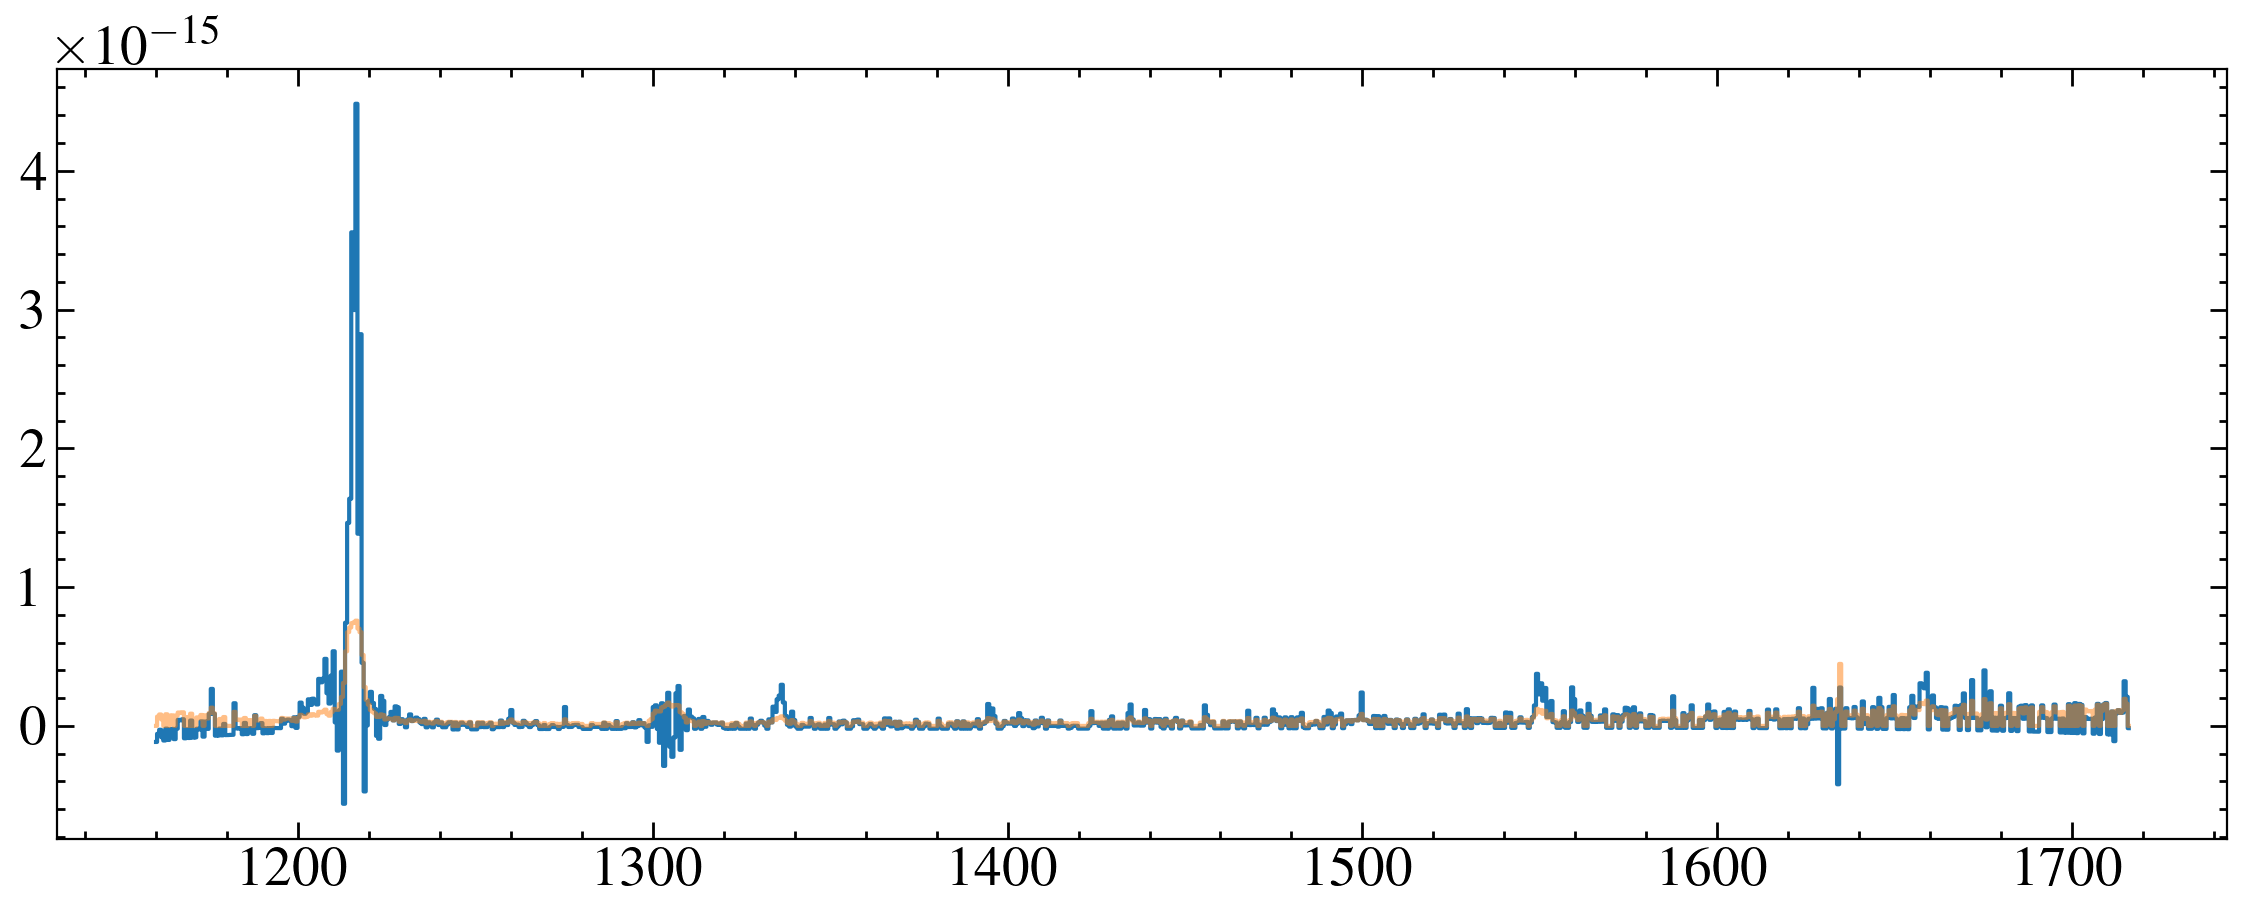

reextractions/hd80606/oeoo44020_new_x1d.fits
G140L
97.667175


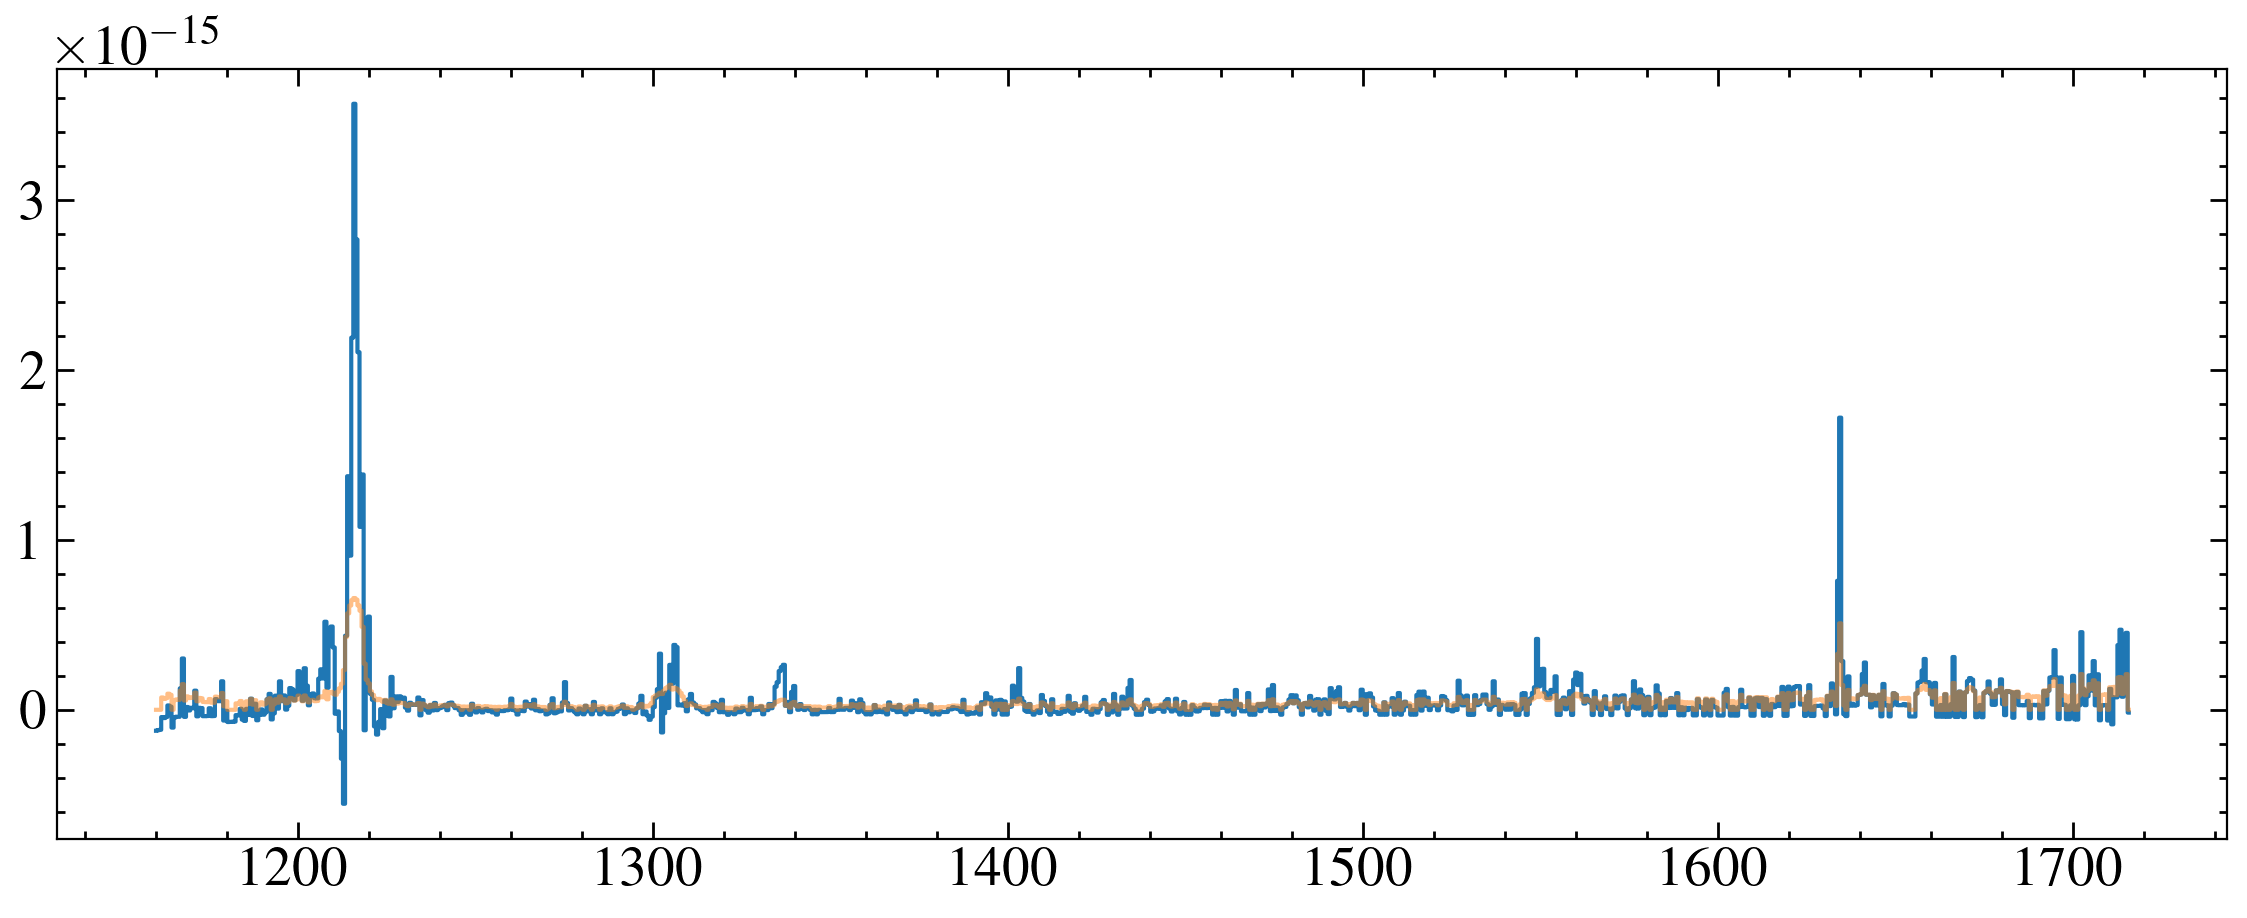

In [5]:
roots = ['oeoo44010', 'oeoo44020']

# xs = [375, 374, 374, 372, 403, 406]
ys = [97, 97]

for i, root in  enumerate(roots):
    flt = '{}{}_flt.fits'.format(path, root)
    SPTRCTAB = fits.getheader(flt,0)['SPTRCTAB']
    grating = fits.getheader(flt,0)['OPT_ELEM']
    cenwave = fits.getheader(flt,0)['CENWAVE']
    # tracegrid = build_trace_grid(path+SPTRCTAB[5:], grating, cenwave)
    rootname = fits.getheader(flt)['ROOTNAME'] 
    outname = 'reextractions/hd80606/{}_new_x1d.fits'.format(rootname)
    if os.path.exists(outname):
        os.remove(outname)
    # a2center = get_a2center(xs[i],ys[i], tracegrid)
    # print(root)
    # print(a2center)
    a2center = ys[i]
    stistools.x1d.x1d(flt, output = outname, trailer='reextractions/hd80606/{}_new.trl'.format(rootname), a2center=a2center, 
                          maxsrch=5, bk1offst=-30, bk2offst=30,bk1size=5, bk2size=5,)
    print(fits.getdata('reextractions/hd80606/{}_new_x1d.fits'.format(rootname),1)['A2CENTER'])

new_x1ds = glob.glob('reextractions/hd80606/*new_x1d.fits')
for x in new_x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e, dq= data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['DQ']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160) #& (w < 1210) | (w > 1220)

    
    w, f, e = w[mask], f[mask], e[mask]

    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid', alpha=0.5)
    # plt.ylim(-0.5e-14,3e-14 )
    
    # data = fits.getdata(x1ds[1], 1)[0]
    # w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # plt.plot(w, f, zorder=-1, ls='--')
    
    plt.show()
    

In [6]:
use_x1ds = np.hstack((new_x1ds, x1ds[2:]))
use_x1ds

array(['reextractions/hd80606/oeoo44010_new_x1d.fits',
       'reextractions/hd80606/oeoo44020_new_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/oeoo44040_sx1.fits'],
      dtype='<U67')

In [7]:
def spectra_adder(f_array, e_array, scale_correct=True):
    """
    Returns a variance-weighted coadd with standard error of the weighted mean (variance weights, scale corrected).
    f_array and e_arrays are collections of flux and error arrays, which should have the same lenth and wavelength scale
    """
    weights = 1 / (e_array**2)
    flux = np.average(f_array, axis =0, weights = weights)
    var = 1 / np.sum(weights, axis=0)
    rcs = np.sum((((flux - f_array)**2) * weights), axis=0) / (len(f_array)-1) #reduced chi-squared
    if scale_correct:
        error = (var * rcs)**0.5
    else:
        error = var**0.5
    return flux,error

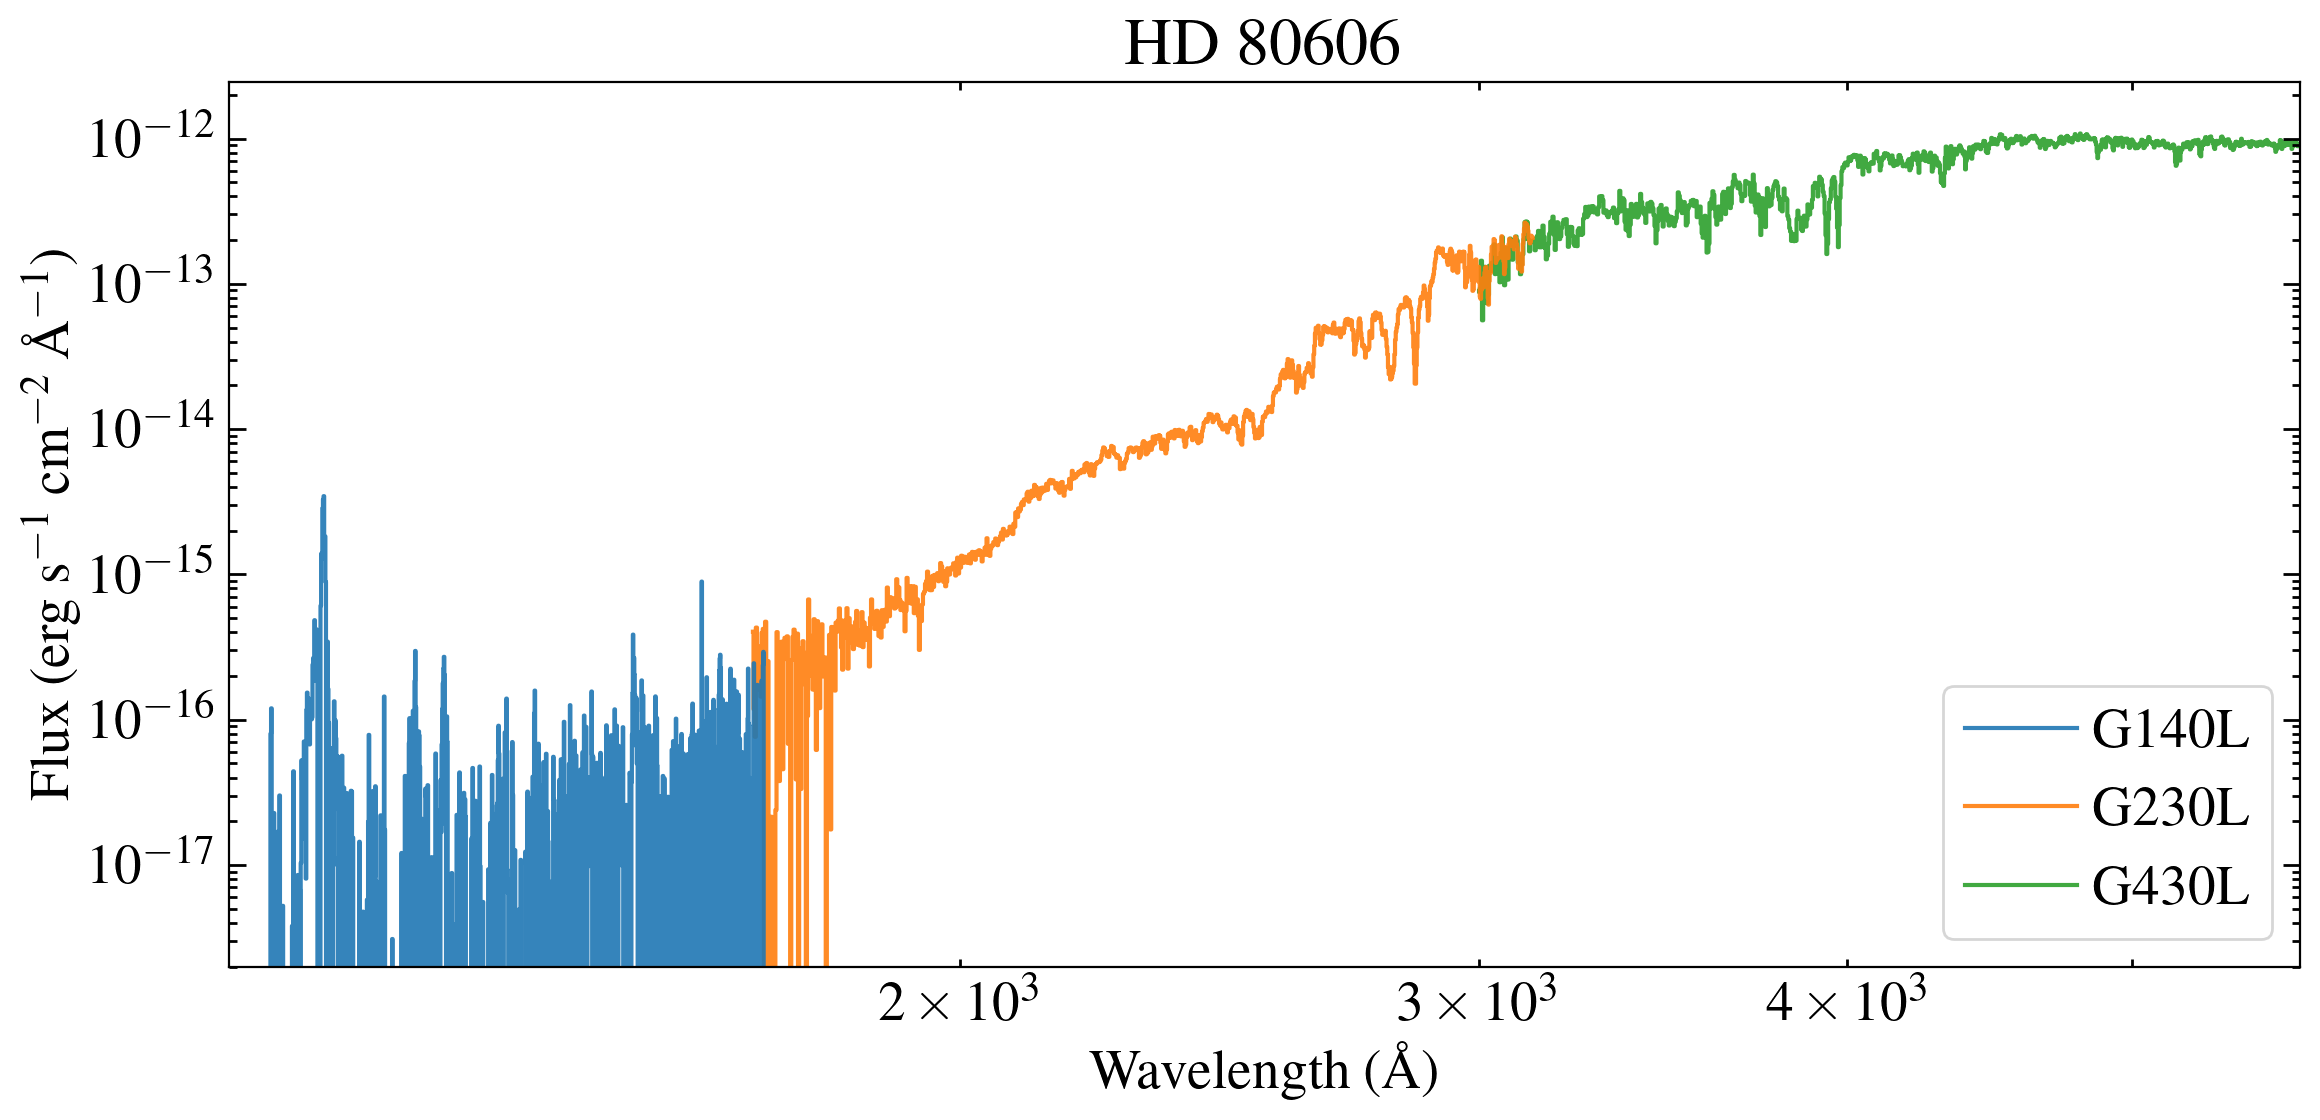

In [8]:
w_fuv = []
f_fuv = []
e_fuv = []
roots = []
n=0
for x in use_x1ds:
    data = fits.getdata(x, 1)[0]
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    grating = fits.getheader(x, 0)['OPT_ELEM']
    if grating == 'G140L':
        roots.append(fits.getheader(x, 0)['ROOTNAME'])
        mask = (w > 1160)
        w, f, e = w[mask], f[mask], e[mask]
        if n == 0:
            w_fuv = w
            f_fuv.append(f)
            e_fuv.append(e)
        else:
            f_fuv.append(interp1d(w, f, fill_value='extrapolate')(w_fuv))
            e_fuv.append(interp1d(w, e, fill_value='extrapolate')(w_fuv))            
        n +=1
    if grating == 'G230L':
        mask = (w > 1700) & (w <3130)
        w_nuv, f_nuv, e_nuv = w[mask], f[mask], e[mask]
    if grating == 'G430L':
        mask = (w > 3000) & (w <5690)
        w_opt, f_opt, e_opt = w[mask], f[mask], e[mask]


        
        
f_fuv, e_fuv = spectra_adder(np.array(f_fuv), np.array(e_fuv), scale_correct=True)
# mask = (f_fuv > 0)
# w_fuv, f_fuv, e_fuv = w_fuv[mask], f_fuv[mask], e_fuv[mask]


plt.figure(figsize=(12, 6))

plt.step(w_fuv, f_fuv, where='mid', label='G140L', alpha=0.9)
# plt.step(w_fuv, e_fuv, where='mid')
plt.step(w_nuv, f_nuv, where='mid', label='G230L', zorder=-1, alpha=0.9)
plt.step(w_opt, f_opt,  where='mid',label='G430L', zorder=-2, alpha=0.9)

plt.yscale('log')
plt.xscale('log')
plt.ylim(2e-18)

plt.xlabel('Wavelength (\AA)')
plt.ylabel('Flux (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')
plt.legend(frameon=True, loc=4)
plt.title('HD 80606')
plt.xlim(1130, 5700)
plt.tight_layout()
plt.savefig('plots/hd80606_ql.pdf')
# plt.savefig('plots/HD-120411_ql.png', facecolor='w')

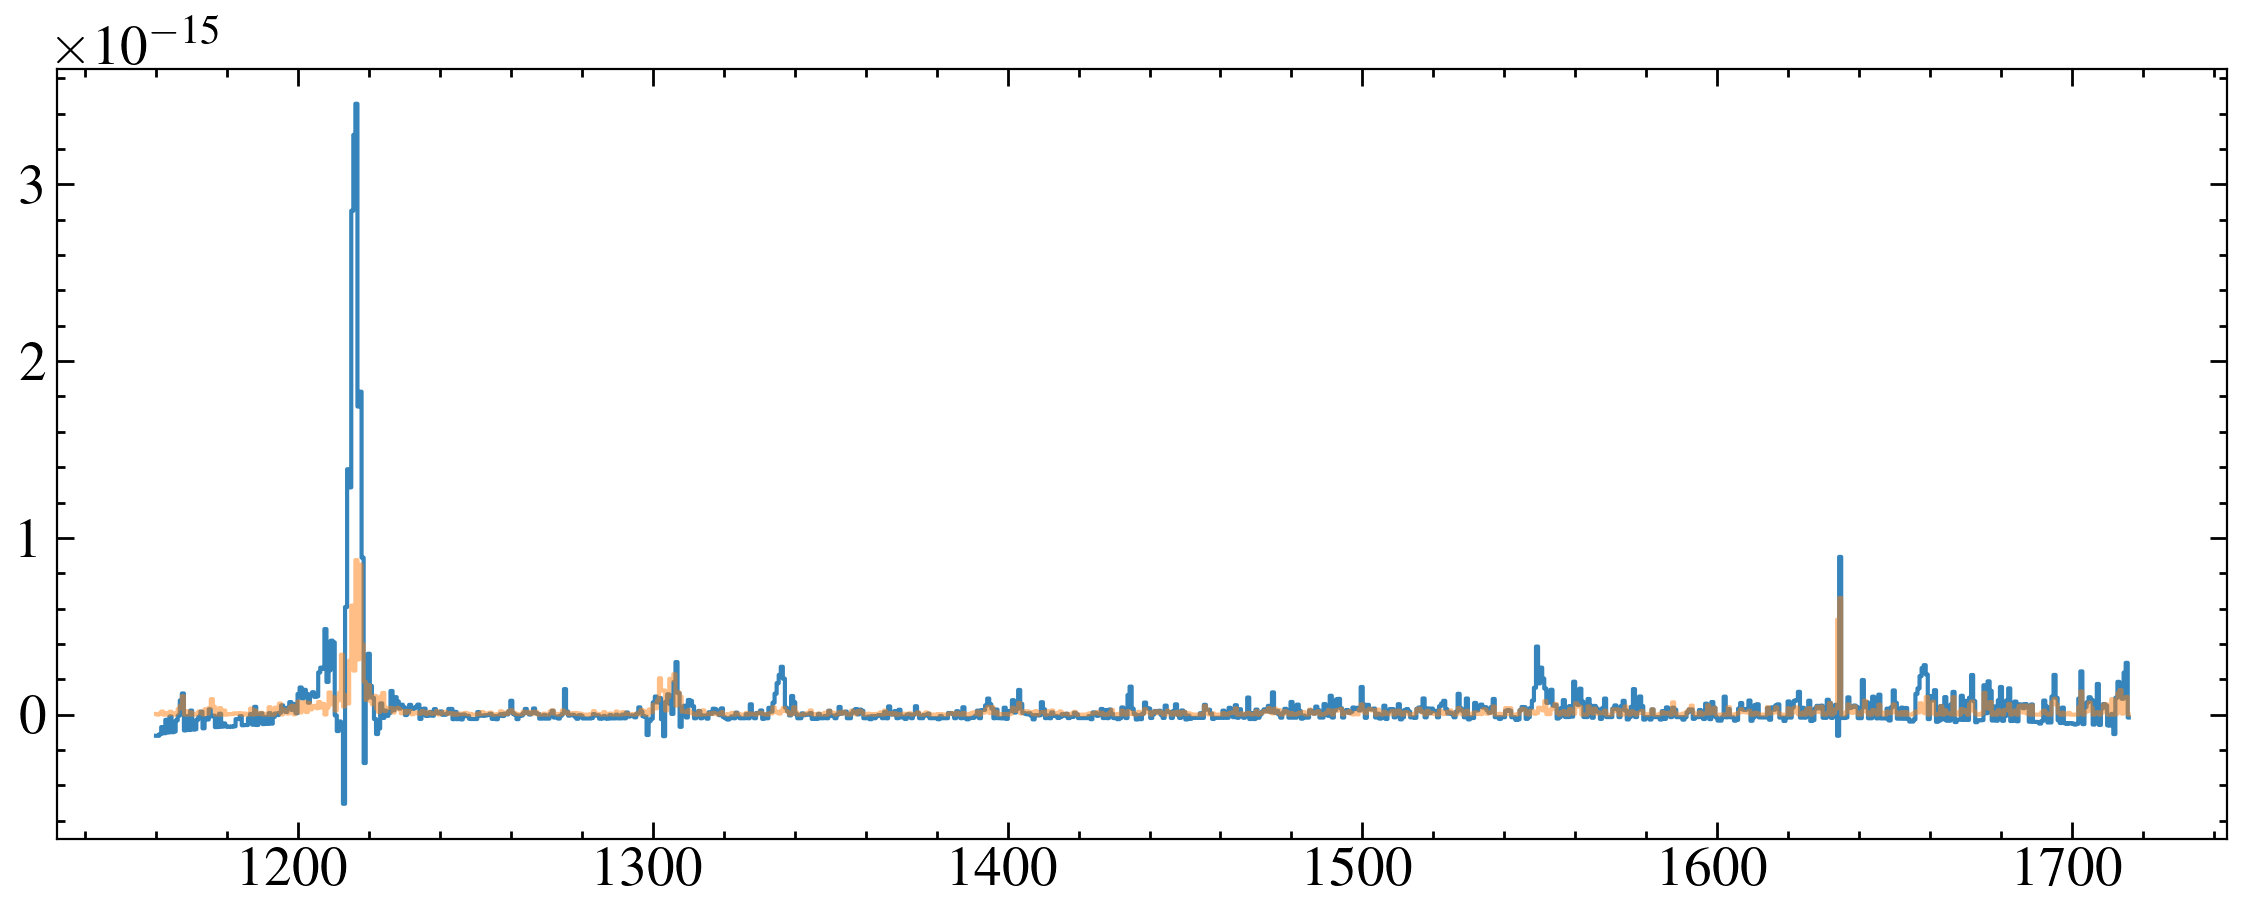

In [9]:
plt.step(w_fuv, f_fuv, where='mid', label='G140L', alpha=0.9)
plt.step(w_fuv, e_fuv, where='mid', alpha=0.5)


/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/astropy/stats/funcs.py:745: RuntimeWarning: invalid value encountered in sqrt
  [n + 0.5 - np.sqrt(n + 0.25), n + 0.5 + np.sqrt(n + 0.25)]
/home/david/work/meats/SEDs/prepare_stis.py:36: RuntimeWarning: divide by zero encountered in divide
  weights = 1 / (e_array**2)
/home/david/anaconda3/envs/stenv/lib/python3.11/site-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


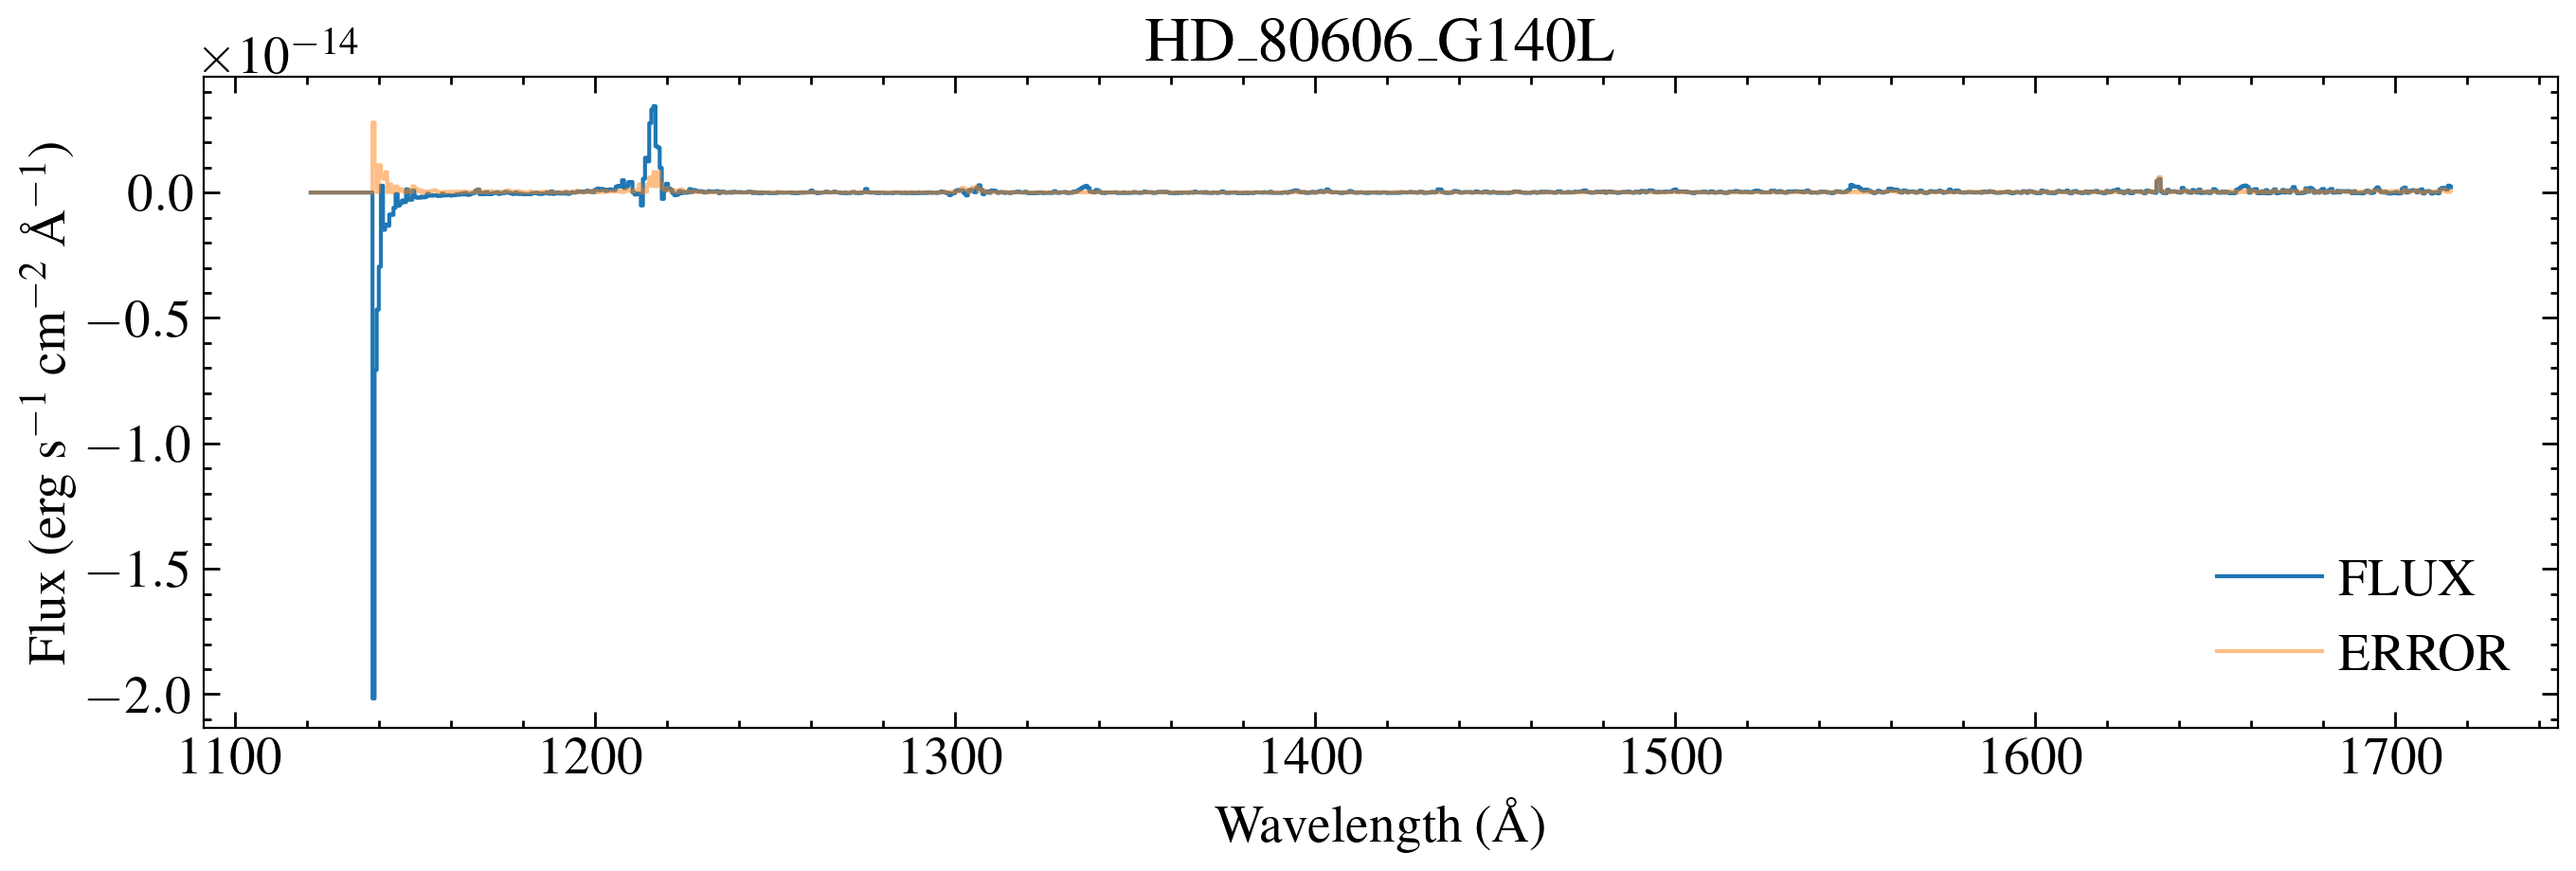

Spectrum saved as hlsp_muscles_hst_stis_hd_80606_g140l_v1_component-spec.fits


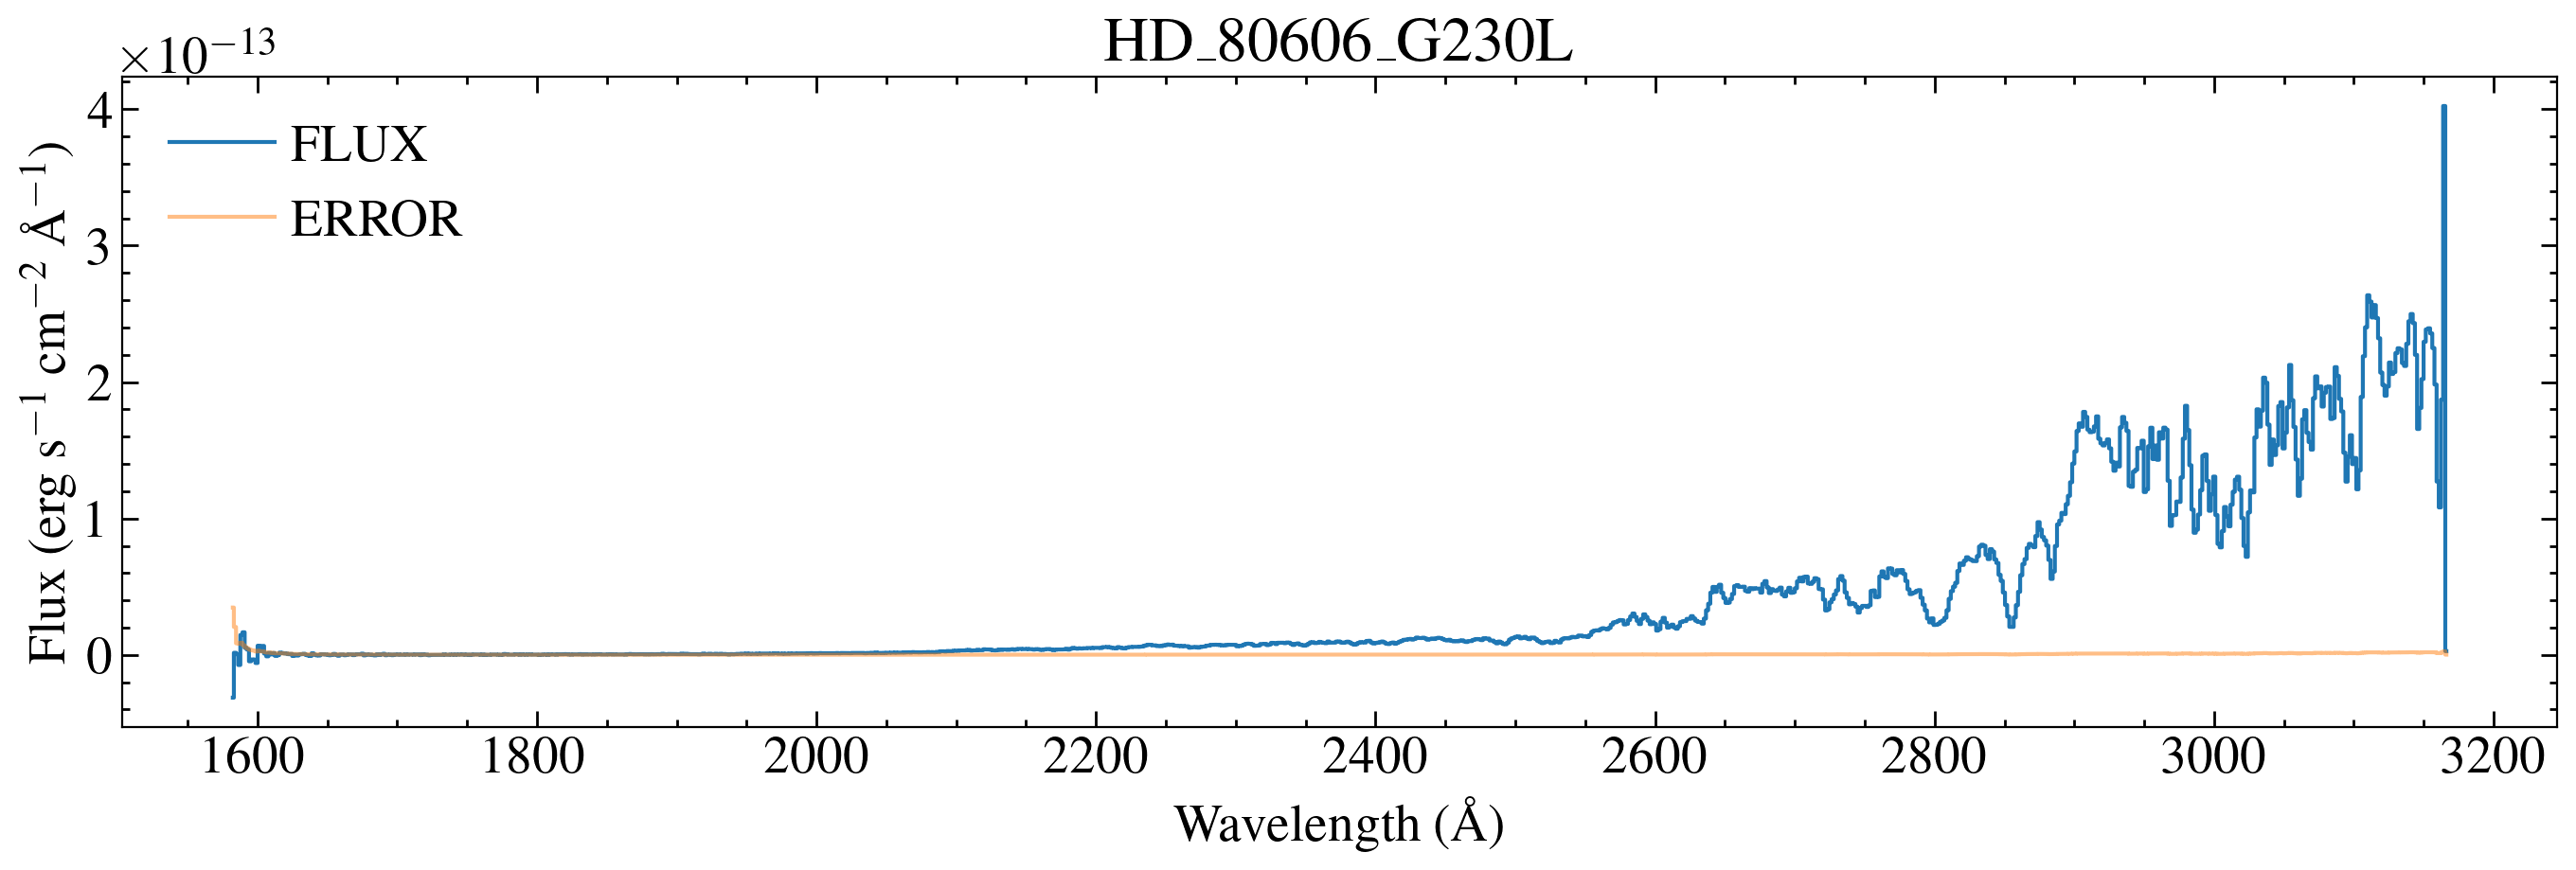

Spectrum saved as hlsp_muscles_hst_stis_hd_80606_g230l_v1_component-spec.fits


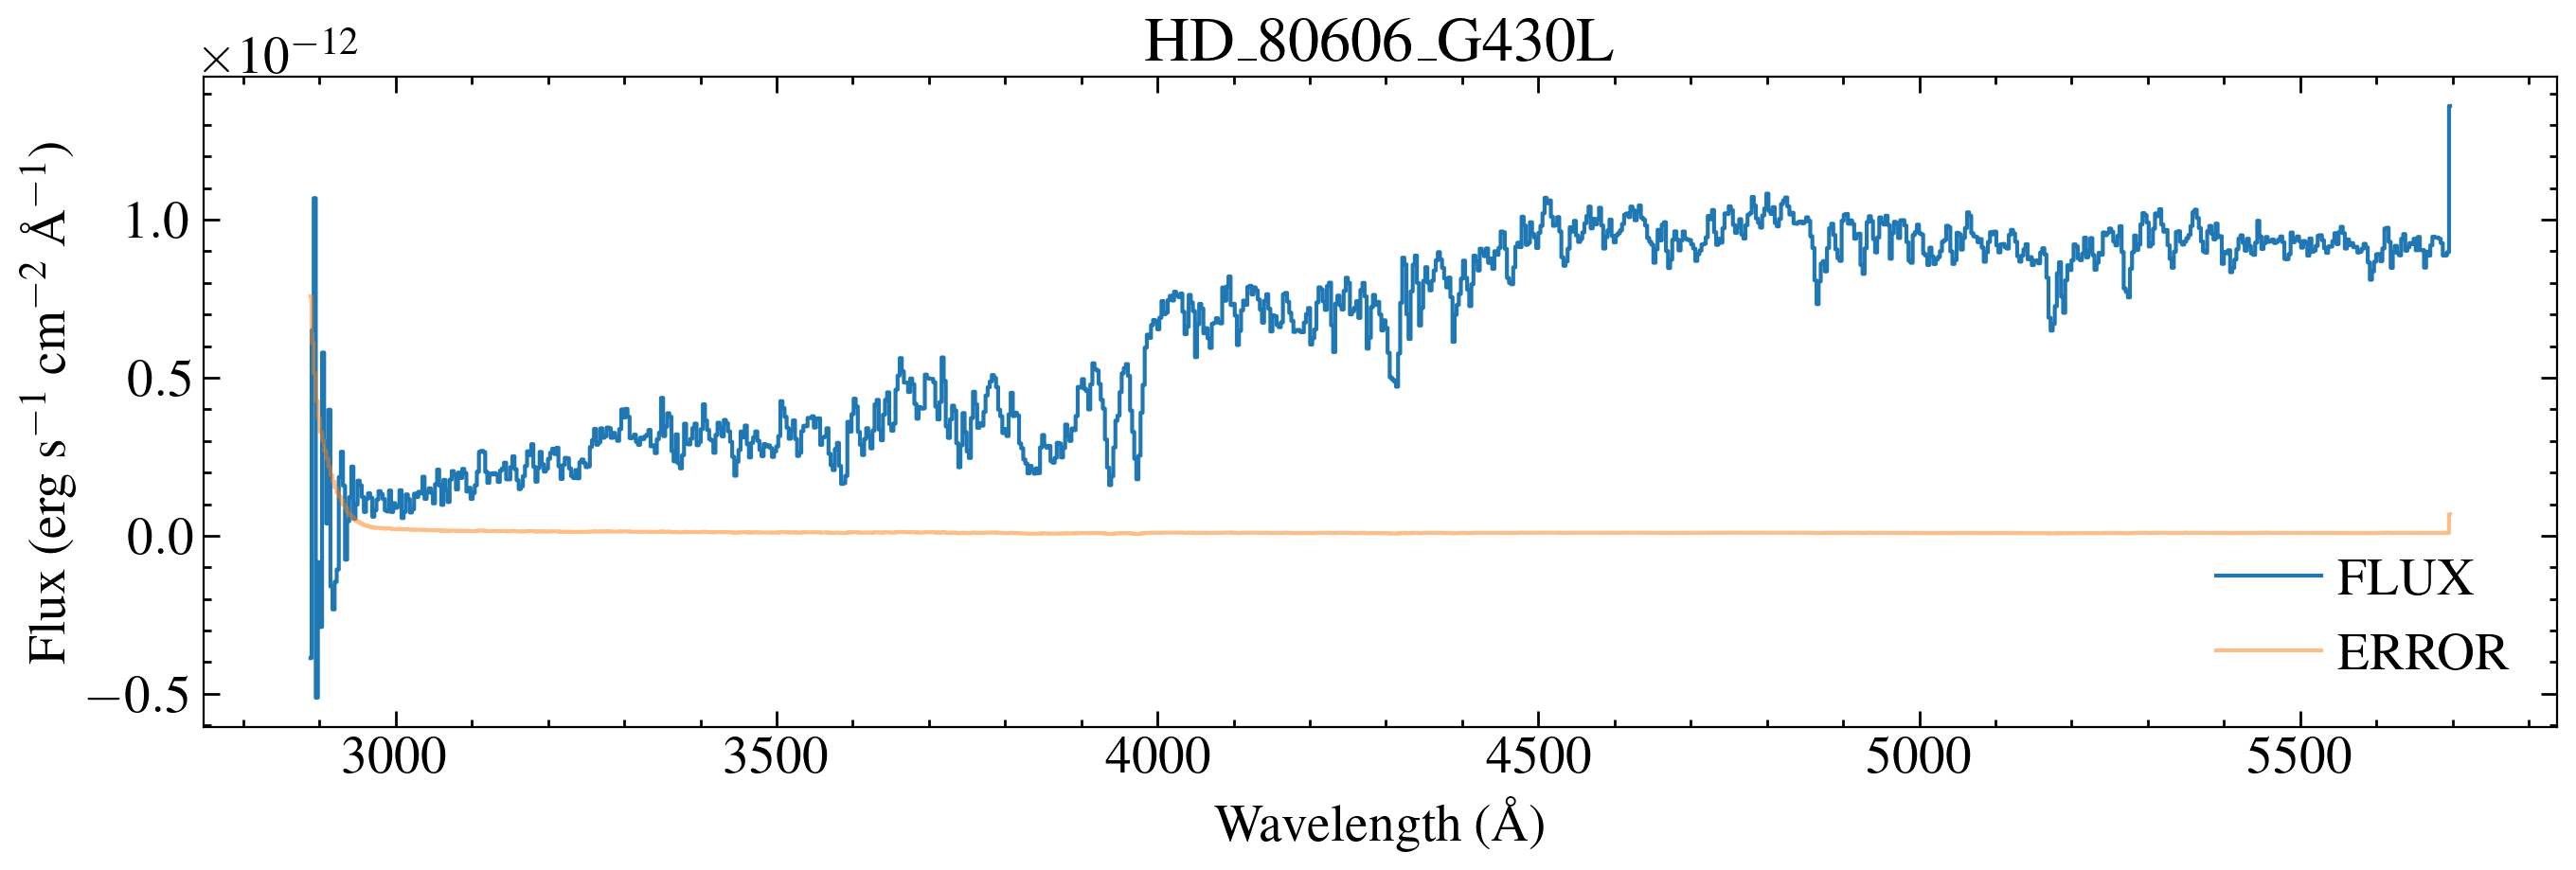

Spectrum saved as hlsp_muscles_hst_stis_hd_80606_g430l_v1_component-spec.fits


In [10]:
import prepare_stis
x1dpath = '/media/david/2tb_ext_hd/hddata/meats/hst/hd80606/use_x1ds/'
savepath = 'draft_hlsp/hd80606/'
hlsp = 'meats_hlsp_info.csv'
version = 1
prepare_stis.make_stis_spectrum(x1dpath, version, hlsp, savepath = savepath, plot=True, save_fits=True, normfac=1.0, star = 'HD_80606')

In [11]:
hlsp_stis = glob.glob('draft_hlsp/hd80606/*stis*')
hlsp_stis

['draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g230l_v1_component-spec.fits',
 'draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g430l_v1_component-spec.fits',
 'draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g140l_v1_component-spec.fits']

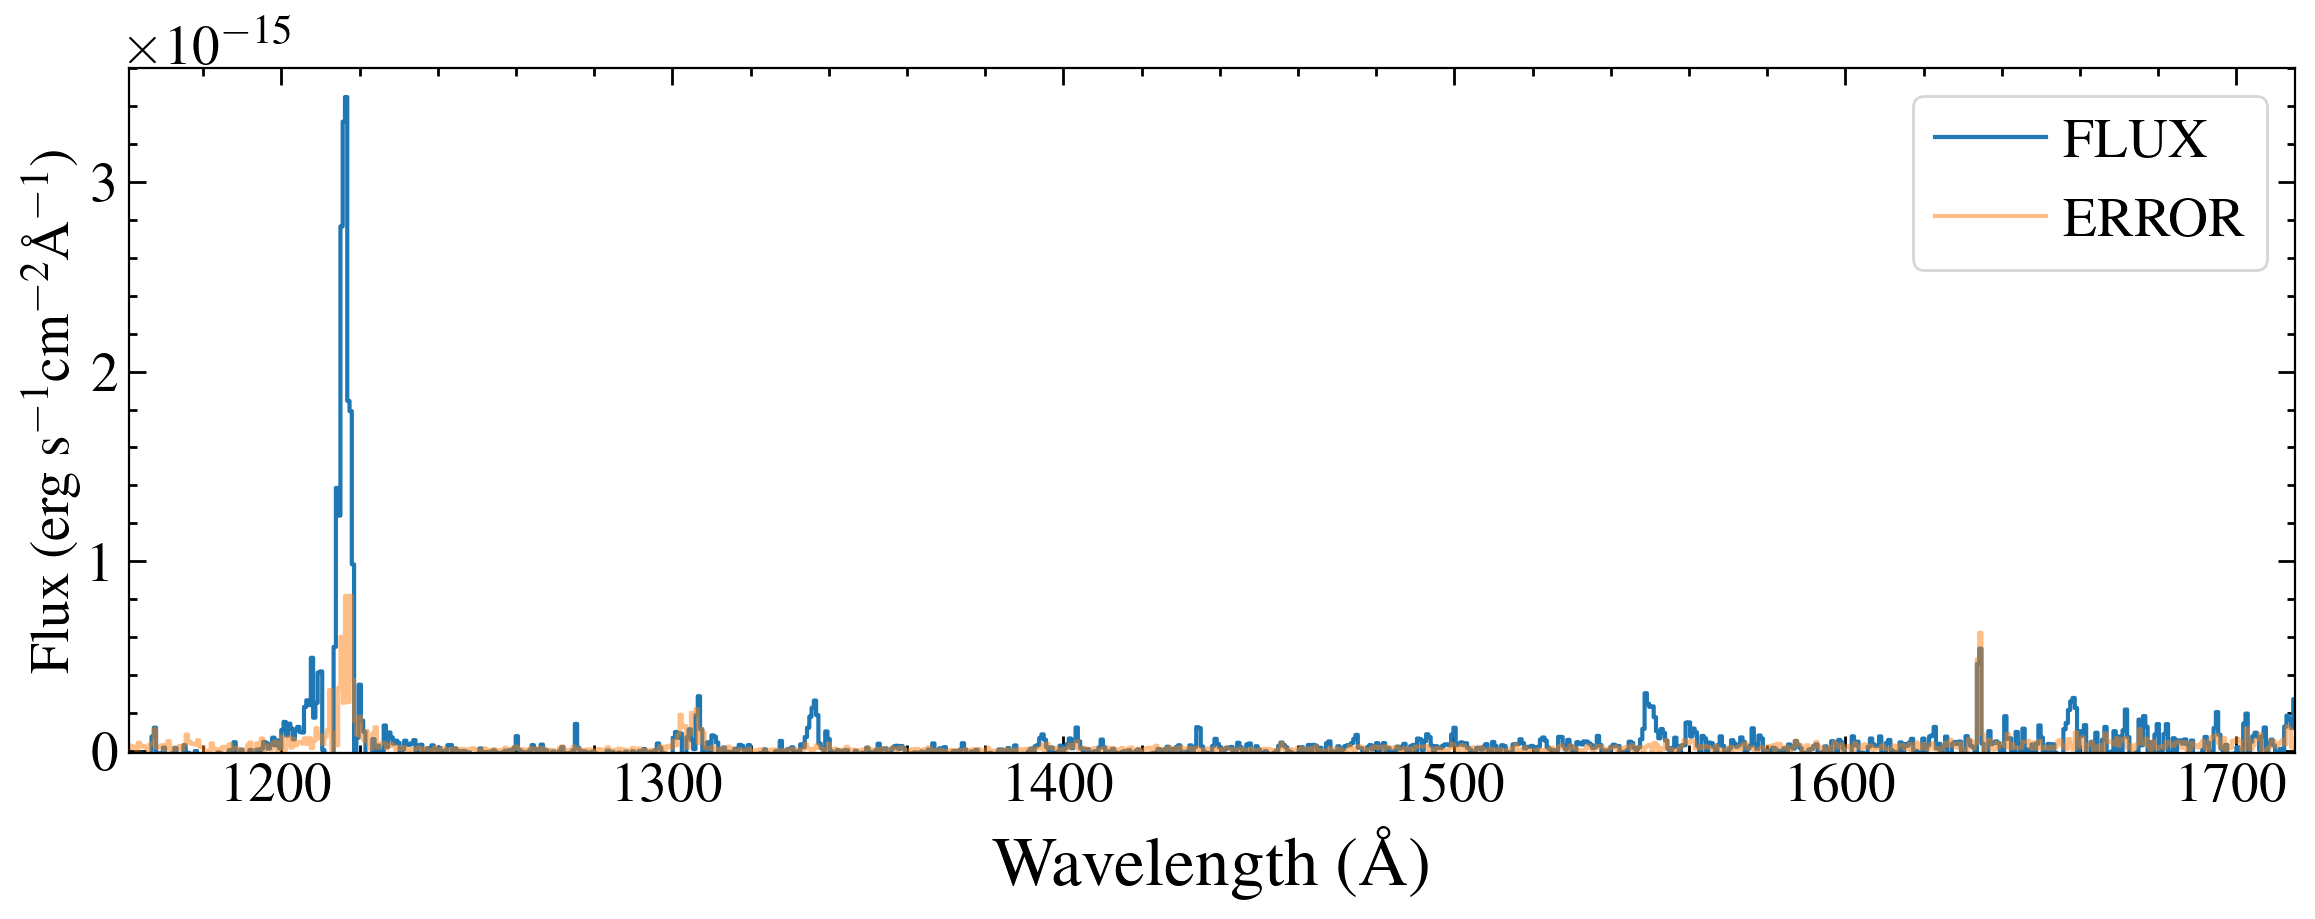

In [12]:
g140l = fits.getdata(hlsp_stis[2], 1)
fig, ax = plt.subplots(figsize=(12, 5))

mask = g140l['WAVELENGTH'] > 1160

ax.step(g140l['WAVELENGTH'][mask], g140l['FLUX'][mask], where='mid', label='FLUX')
ax.step(g140l['WAVELENGTH'][mask], g140l['ERROR'][mask], where='mid', alpha=0.5, label='ERROR')

ax.set_xlim(1161, 1715)

ax.set_ylim(-1e-17, 3.6e-15)
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')

ax.set_xlabel('Wavelength (\AA)', size=25)

ax.legend(frameon=True)
fig.tight_layout()

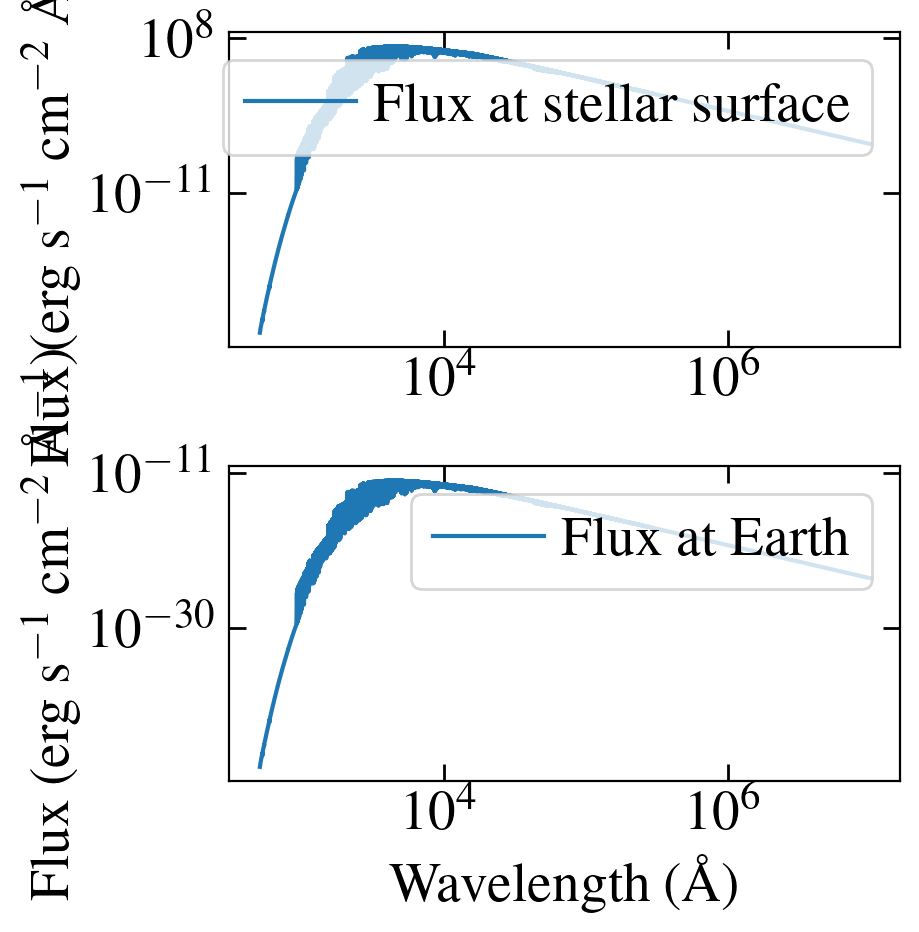

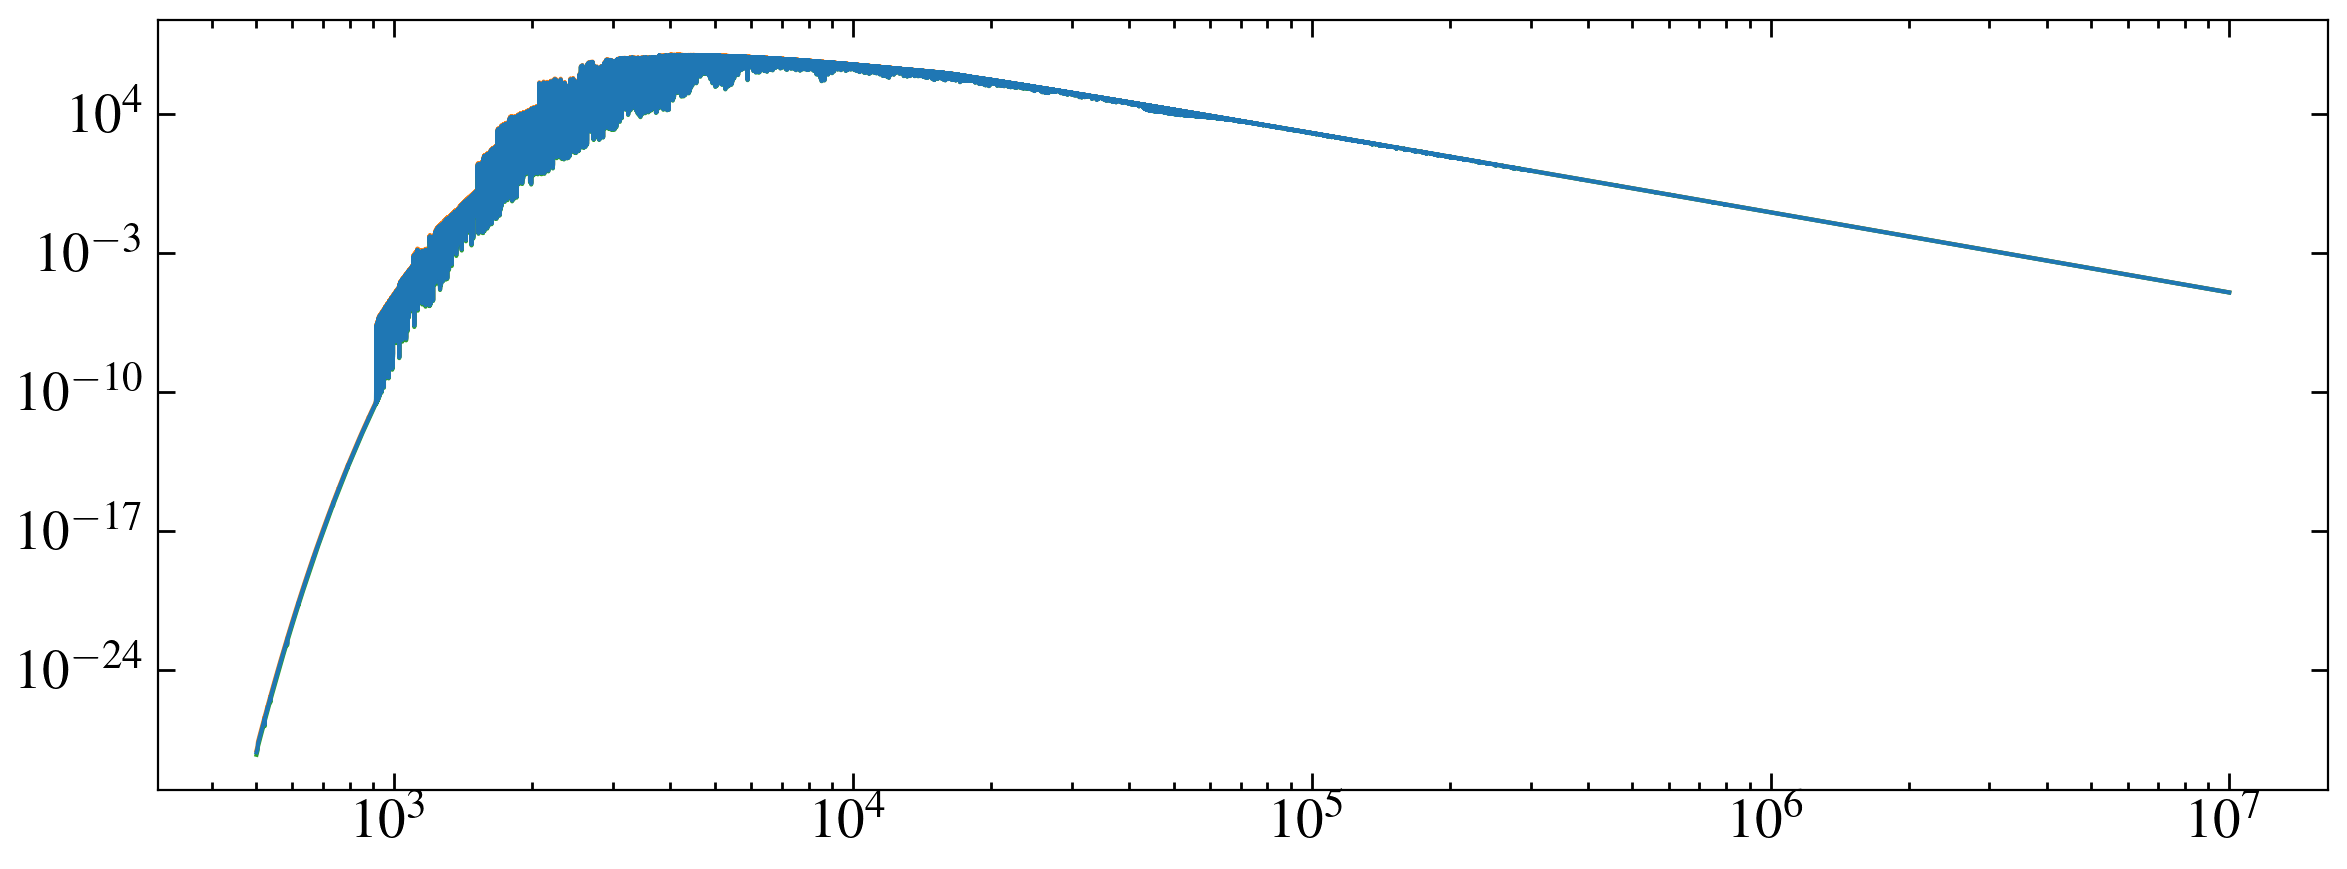

In [13]:
import prepare_phoenix_svo as pp
# importlib.reload(pp)

G = const.G
M = const.M_sun.to(u.kg)
R = const.R_sun.to(u.m)
mass = 1.15
teff = 5561
teff_e = 24

radius = 1.04
distance = 66.03

save_path = 'models/'
star = 'hd-80606'
# g = ((G*mass*M)/(radius*R)**2).to(u.cm/u.s**2)
g = 4.46
repo = '/media/david/2tb_ext_hd/hddata/mega_muscles/data-vacuum/'

star_params = {'Teff': teff, 'Teff_e':teff_e,  'logg': g, 'FeH': 0.00, 'aM': 0, 'Radius':radius*u.R_sun, 'Distance':distance*u.pc}
# pw, pf, pe = pp.make_phoenix_spectrum(star, save_path, repo, star_params, save_ecsv=True, plot=True, make_error=True)
pdata = Table.read('models/{}_phoenix_interpolated.ecsv'.format(star))
pw, pf, pe = pdata['WAVELENGTH'], pdata['FLUX'], pdata['ERROR']
normfac = ((radius*R)/((distance*u.pc).to(u.m)))**2

In [14]:
import prepare_model
hdr = fits.getheader('draft_hlsp/hd80606/hlsp_muscles_hst_stis_hd_80606_g230l_v1_component-spec.fits', 0)
sed_data = Table(meta=hdr)
#PHX
prepare_model.make_model_spectrum('models/hd-80606_phoenix_interpolated.ecsv', 1, sed_data, savepath = savepath, save_ecsv=False, save_fits=True, normfac=normfac.value, model_name='PHX')


Spectrum saved as hlsp_muscles_model_phx_hd_80606_na_v1_component-spec.fits


X-ray has a problem where wavelengths are out by 1000x?

In [15]:
xpath = '/media/david/2tb_ext_hd/hddata/meats/xmm/hd_80606/HD80606_xray.fits'
hdul = fits.open(xpath)
hdr = hdul[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
HIERARCH pn_FILTER = 'Medium  '                                                 
HIERARCH pn_MODE = 'IMAGING '                                                   
HIERARCH pn_SUBMODE = 'PrimeFullWindow'                                         
HIERARCH DATE-OBS = '2018-11-15T10:08:48'                                       
HIERARCH DATE-END = '2018-11-15T19:07:29'                                       
HIERARCH pn_EXP_ID = '0821400201014'                                            
HIERARCH pn_DURATION = 36813.0                                                  
TARGET  = 'HD 80606'                                                            

In [16]:
data = hdul[1].data
data

FITS_rec([(0.0434, 0.0186, 0.0003279 , 2.3472984, 0.00027769, 1.3584227e-15, 9.7245224e-12, 1.1504142e-15),
          (0.0186, 0.0062, 0.00010452, 2.1940422, 0.00025514, 2.6875672e-16, 5.6418225e-12, 6.5608303e-16),
          (0.0093, 0.0031, 0.00027154, 2.4369895, 0.00032175, 7.7582314e-15, 6.9628275e-11, 9.1927732e-15)],
         dtype=(numpy.record, [('Wave', '>f4'), ('bin_width', '>f4'), ('Rate', '>f4'), ('Rate_error', '>f4'), ('Rate_uplim', '>f4'), ('Flux', '>f4'), ('Flux_error', '>f4'), ('Flux_uplim', '>f4')]))

<ErrorbarContainer object of 3 artists>

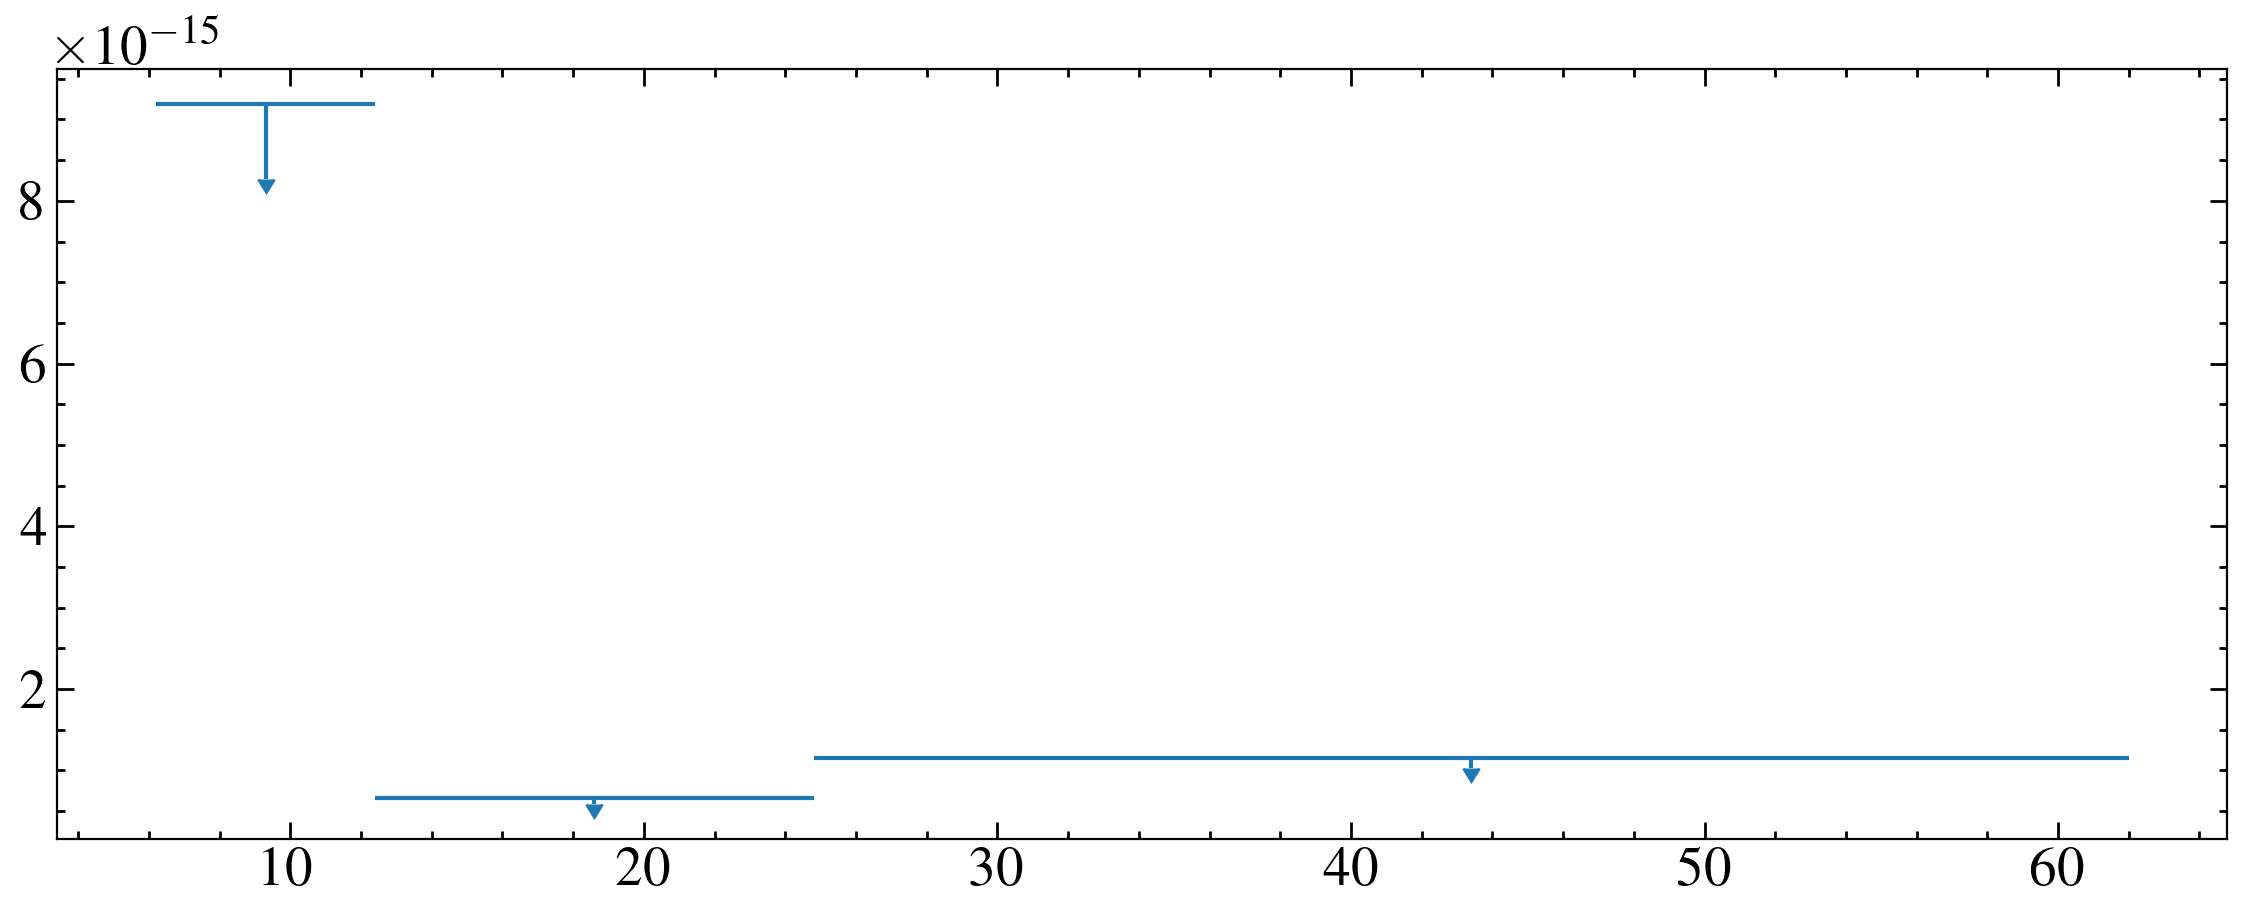

In [22]:
fig, ax = plt.subplots()

# ax.errorbar(data['Wave'], data['Flux'], xerr=data['bin_width'], yerr=data['Flux_error'], ls='none')
# ax.errorbar(data['Wave'], data['Flux_uplim'], xerr=data['bin_width'], yerr=data['Flux_uplim']*0.1, ls='none', uplims=True)
ax.errorbar(data['Wave']*1000, data['Flux_uplim'], xerr=data['bin_width']*1000, yerr=data['Flux_uplim']*0.1, ls='none', uplims=True)

Data is all upper limits so just use the APEC model in the SED

In [23]:
hdr.append(('mos1_FILTER', 'Medium'))
hdr.append(('mos2_FILTER', 'Medium'))
hdr.append(('pn_FILTER', 'Medium'))
hdr.append(('pn_DURATION', 37900))
hdr.append(('pn_DATE-OBS', '2018-11-15 08:45:57'))
hdr.append(('pn_DATE-END','2018-11-15 19:17:37' ))
hdr.append(('OBS_ID', '0821400201'))
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
HIERARCH pn_FILTER = 'Medium  '                                                 
HIERARCH pn_MODE = 'IMAGING '                                                   
HIERARCH pn_SUBMODE = 'PrimeFullWindow'                                         
HIERARCH DATE-OBS = '2018-11-15T10:08:48'                                       
HIERARCH DATE-END = '2018-11-15T19:07:29'                                       
HIERARCH pn_EXP_ID = '0821400201014'                                            
HIERARCH pn_DURATION = 36813.0                                                  
TARGET  = 'HD 80606'                                                            
HIERARCH mos1_FILTER = 'Medi

In [24]:
data['Wave'] = data['Wave']*1000
data['bin_width'] = data['bin_width']*1000

In [25]:
hdul.writeto('/media/david/2tb_ext_hd/hddata/meats/xmm/hd_80606/HD80606_xray_djw.fits', overwrite=True)


In [30]:
import importlib
import prepare_xmm
importlib.reload(prepare_xmm)
xmm_path = '/media/david/2tb_ext_hd/hddata/meats/xmm/hd_80606/HD80606_xray_djw.fits'

hlsp = dict(Table.read('meats_hlsp_info.csv'))
# hlsp = np.genfromtxt('meats_hlsp_info.csv', delimiter=',', dtype=None, names=True)
# xmm_path = xpath
version = 1

prepare_xmm.make_xmm_spectra(xmm_path, savepath, version, hlsp, apec_repo='models/', make_apec=True, save_ecsv=False, save_fits=True, uplims=True)

Spectrum saved as hlsp_muscles_xmm_epic_hd80606_na_v1_component-spec.fits


Need flux values for the APEC spectrum, have emailed Christian. Not sure the'll have uncertainty values on them, could just assume a flat error

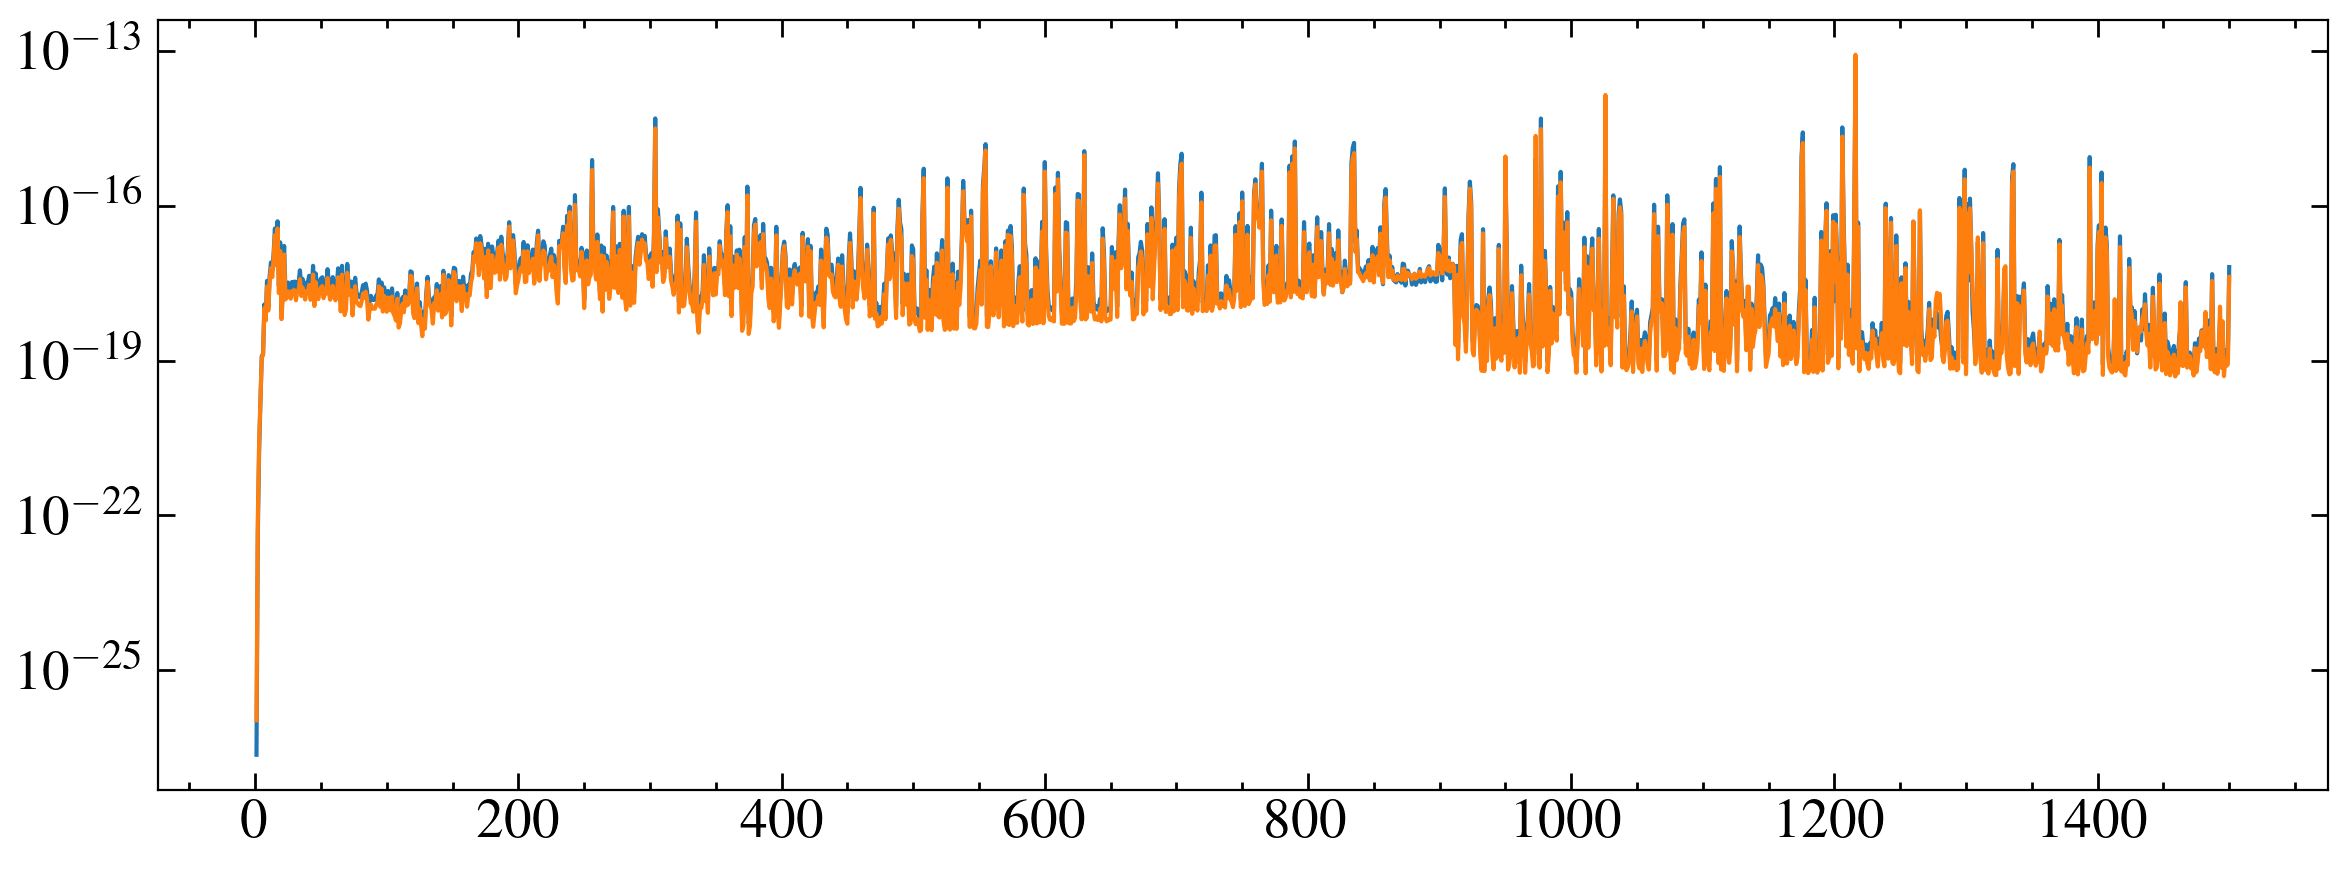

In [32]:
#dem
# dem
dempath = '/media/david/2tb_ext_hd/hddata/meats/dems/hd_80606/spectrum_hd_80606_p17.fits'
dem = fits.getdata(dempath, 1)

dw, df= dem['Wavelength'], dem['Flux_density']
eu, el = dem['Upper_Error_84'], dem['Lower_Error_16']


mean_e = np.mean([eu, el], axis=0)
# plt.plot(dw, mean_e)
# plt.yscale('log')

log_mean_e = (eu - el) / (np.log(eu)- np.log(el))

plt.plot(dw, df)
plt.plot(dw, log_mean_e)
# plt.plot(dw, mean_e)

plt.yscale('log')

demtab = Table([dw, df, log_mean_e], names=['WAVELENGTH', 'FLUX', 'ERROR'])
demtab.write('models/hd_80606_dem.ecsv', overwrite=True)



In [33]:
prepare_model.make_model_spectrum('models/hd_80606_dem.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='dem')


Spectrum saved as hlsp_muscles_model_dem_hd_80606_na_v1_component-spec.fits


In [34]:
#lya while we wait...
lyapath = '/media/david/2tb_ext_hd/hddata/meats/lya/hd_80606/HD80606_LyA_estimate.txt'

prepare_model.make_model_spectrum(lyapath, 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1, model_name='lya')


Spectrum saved as hlsp_muscles_model_lya_hd_80606_na_v1_component-spec.fits


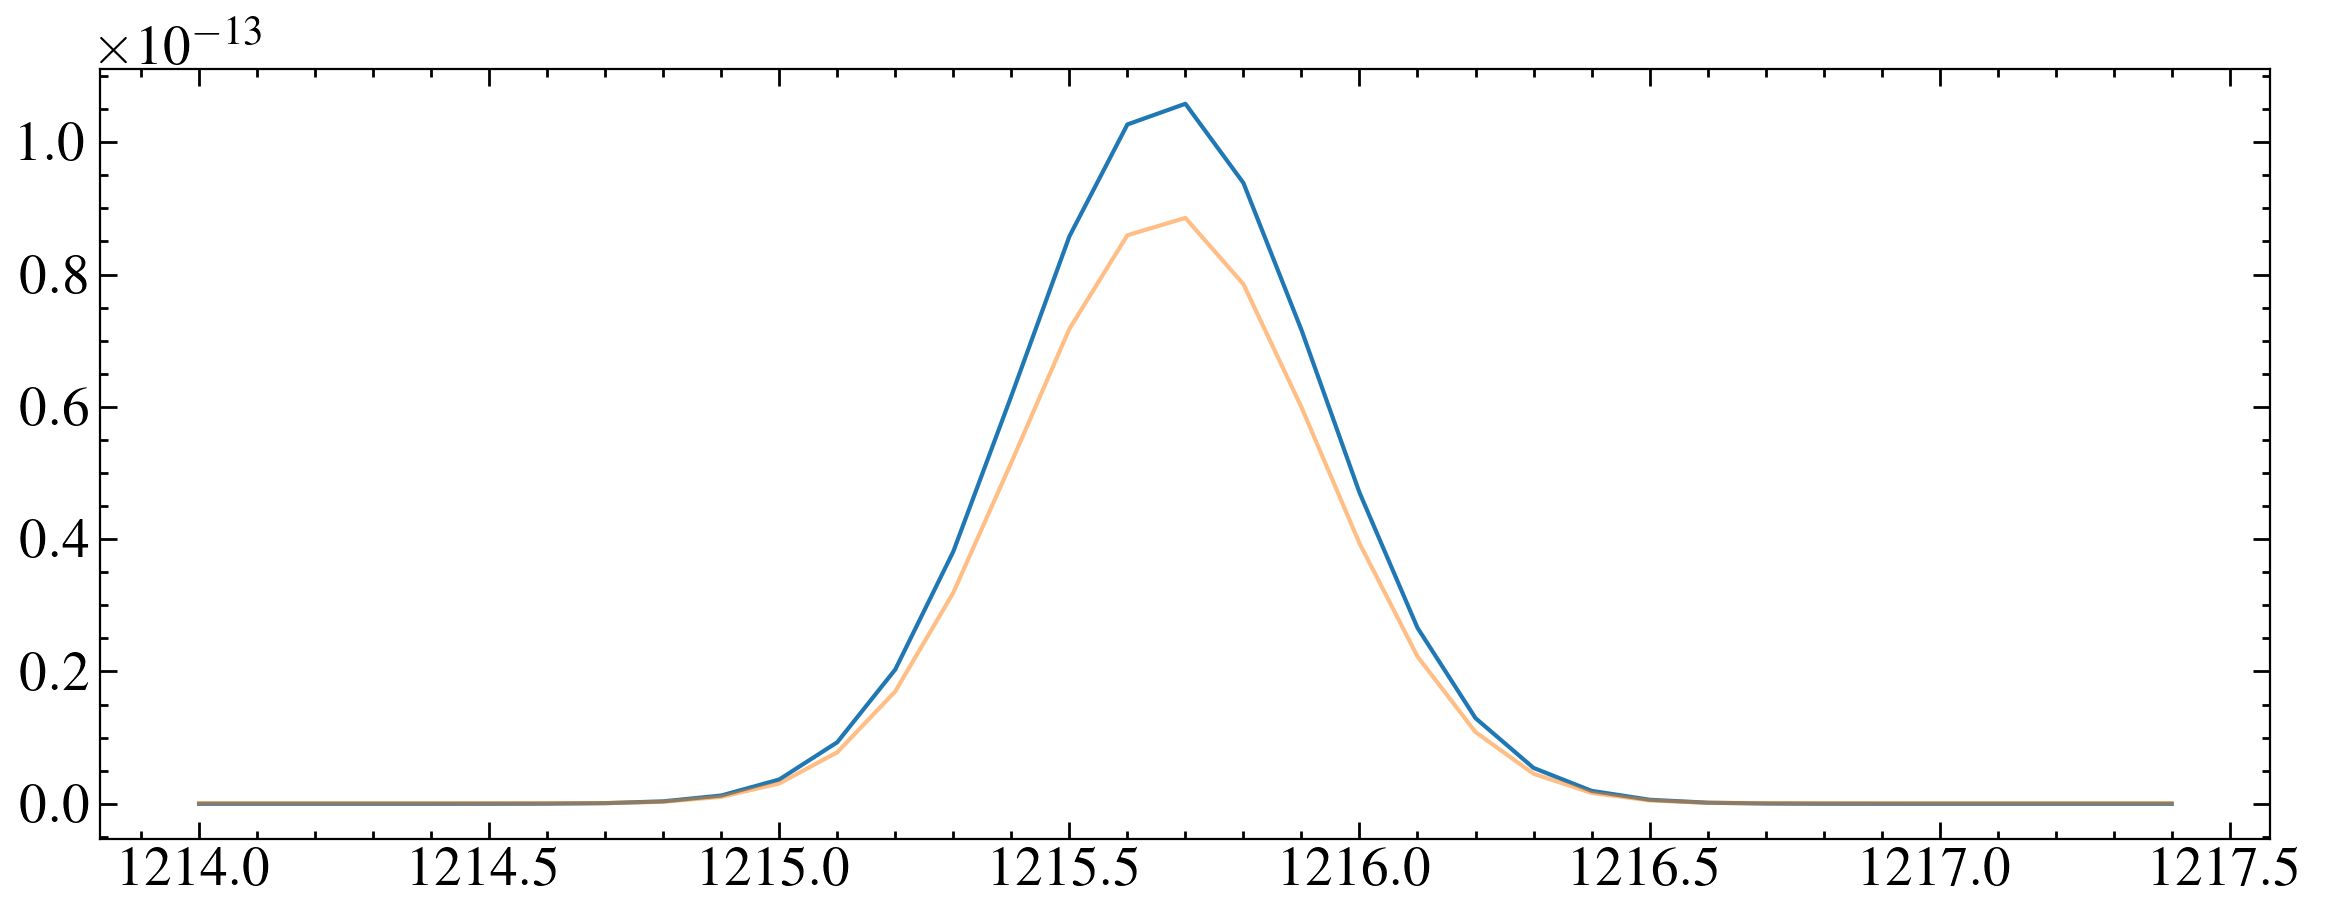

In [35]:
lya = fits.getdata('draft_hlsp/hd80606/hlsp_muscles_model_lya_hd_80606_na_v1_component-spec.fits', 1)
fig, ax = plt.subplots()
ax.plot(lya['WAVELENGTH'], lya['FLUX'])
ax.plot(lya['WAVELENGTH'], lya['ERROR'], alpha=0.5)
# ax.plot(lya['WAVELENGTH'], lya['FLUX']/lya['ERROR'])
# ax.set_yscale('log')

check the phx model fits the data...horray!

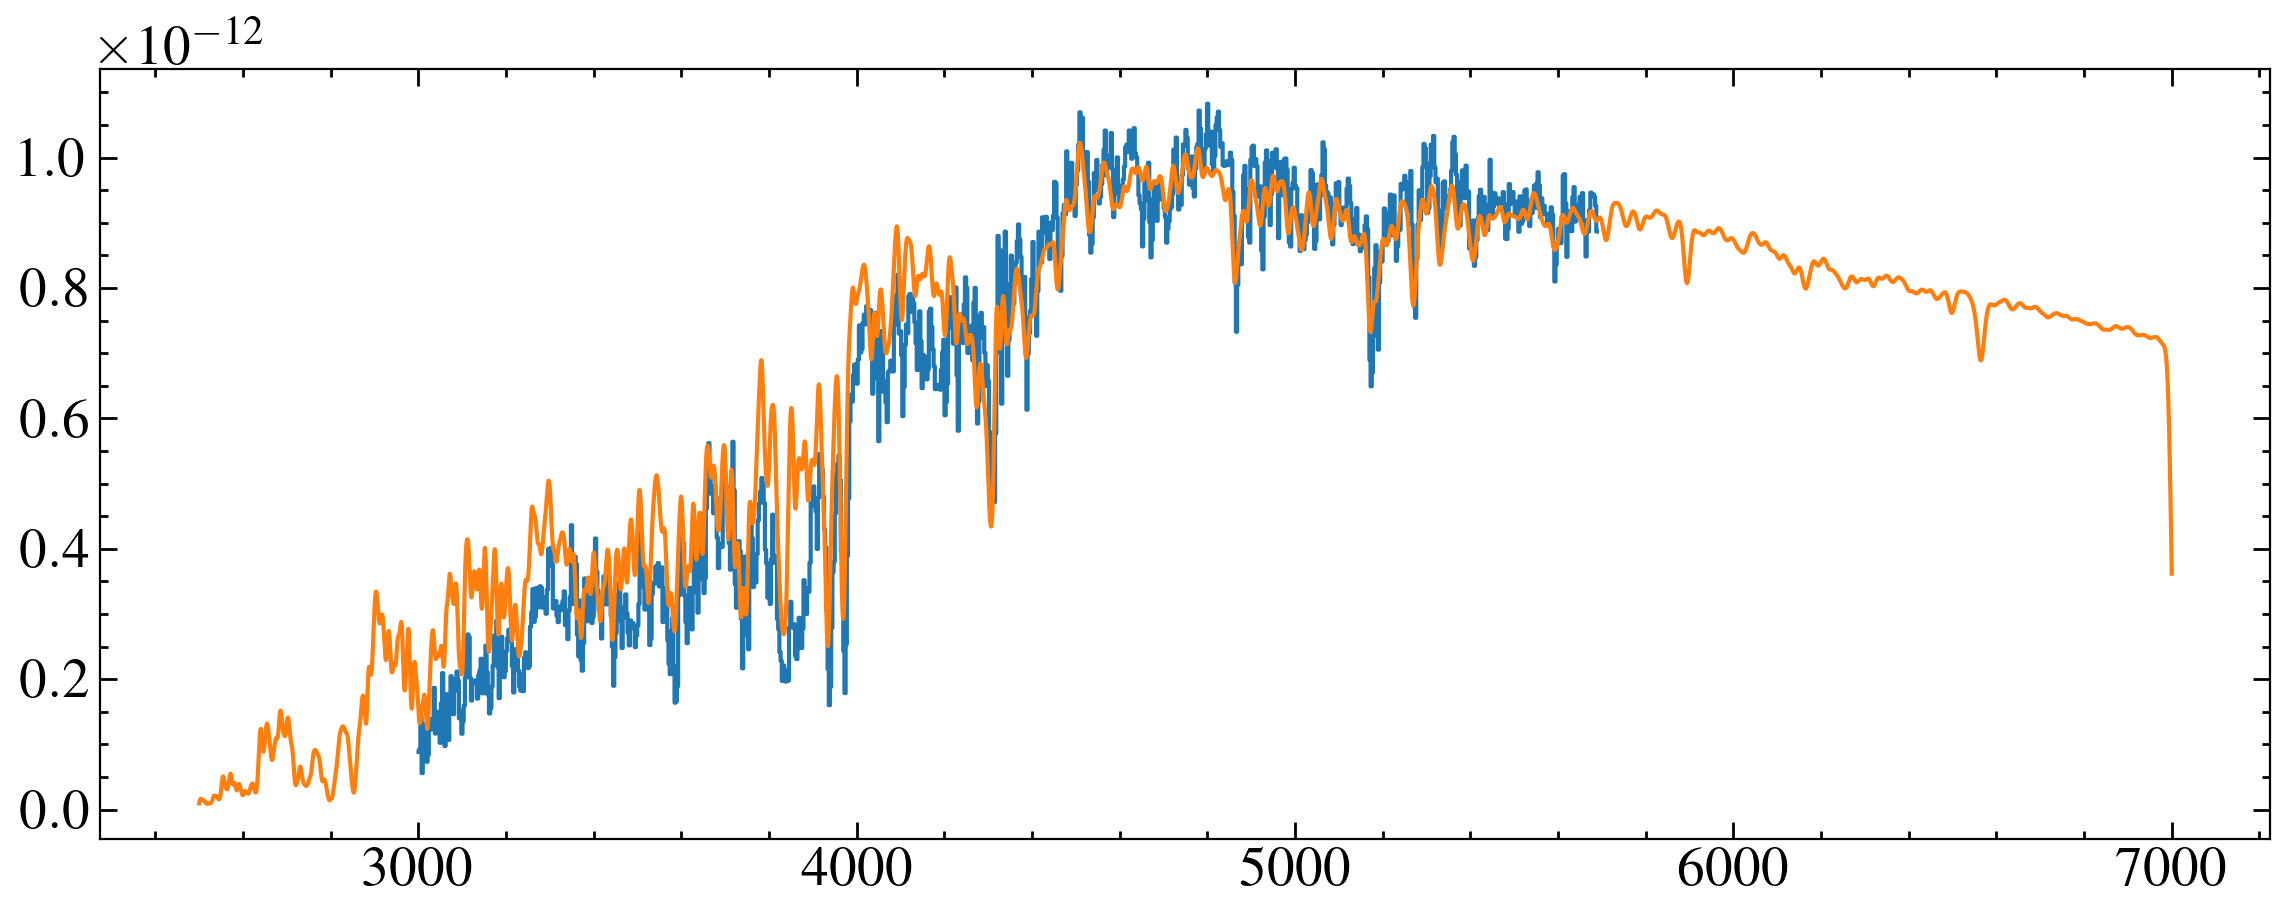

In [37]:
fig, ax = plt.subplots()

ax.step(w_opt, f_opt, where='mid')

pmask = (pw > 2500) & (pw < 7000)
pwi, pfi = pw[pmask], pf[pmask]*normfac
pwi, pfi = pp.smear(pwi, pfi, 1000)

ax.plot(pwi, pfi)


estimating the APEC error at 10% for now

In [42]:
data = Table.read('models/HD80606apec.txt', format='ascii.basic')

savdat = Table((data['WAVELENGTH']*u.AA, data['FLUX']*u.erg/u.s/u.cm**2/u.AA , (data['FLUX']*0.1)*u.erg/u.s/u.cm**2/u.AA), 
               names=['WAVELENGTH', 'FLUX', 'ERROR'])


savdat.write('models/hd_80606_apec_errs.ecsv', format='ascii.ecsv', overwrite=True)
       

In [43]:
prepare_model.make_model_spectrum('models/hd_80606_apec_errs.ecsv', 1, sed_data ,savepath = savepath, save_ecsv=False, save_fits=True, normfac=1.0, model_name='apec')


Spectrum saved as hlsp_muscles_model_apec_hd_80606_na_v1_component-spec.fits


In [46]:
starspec = fits.getdata('fixed_hlsp/hd80606/hlsp_muscles_multi_multi_hd_80606_broadband_v25_adapt-const-res-sed.fits', 1)
starw, starf = starspec['WAVELENGTH'], starspec['FLUX']
sol = Table.read('Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

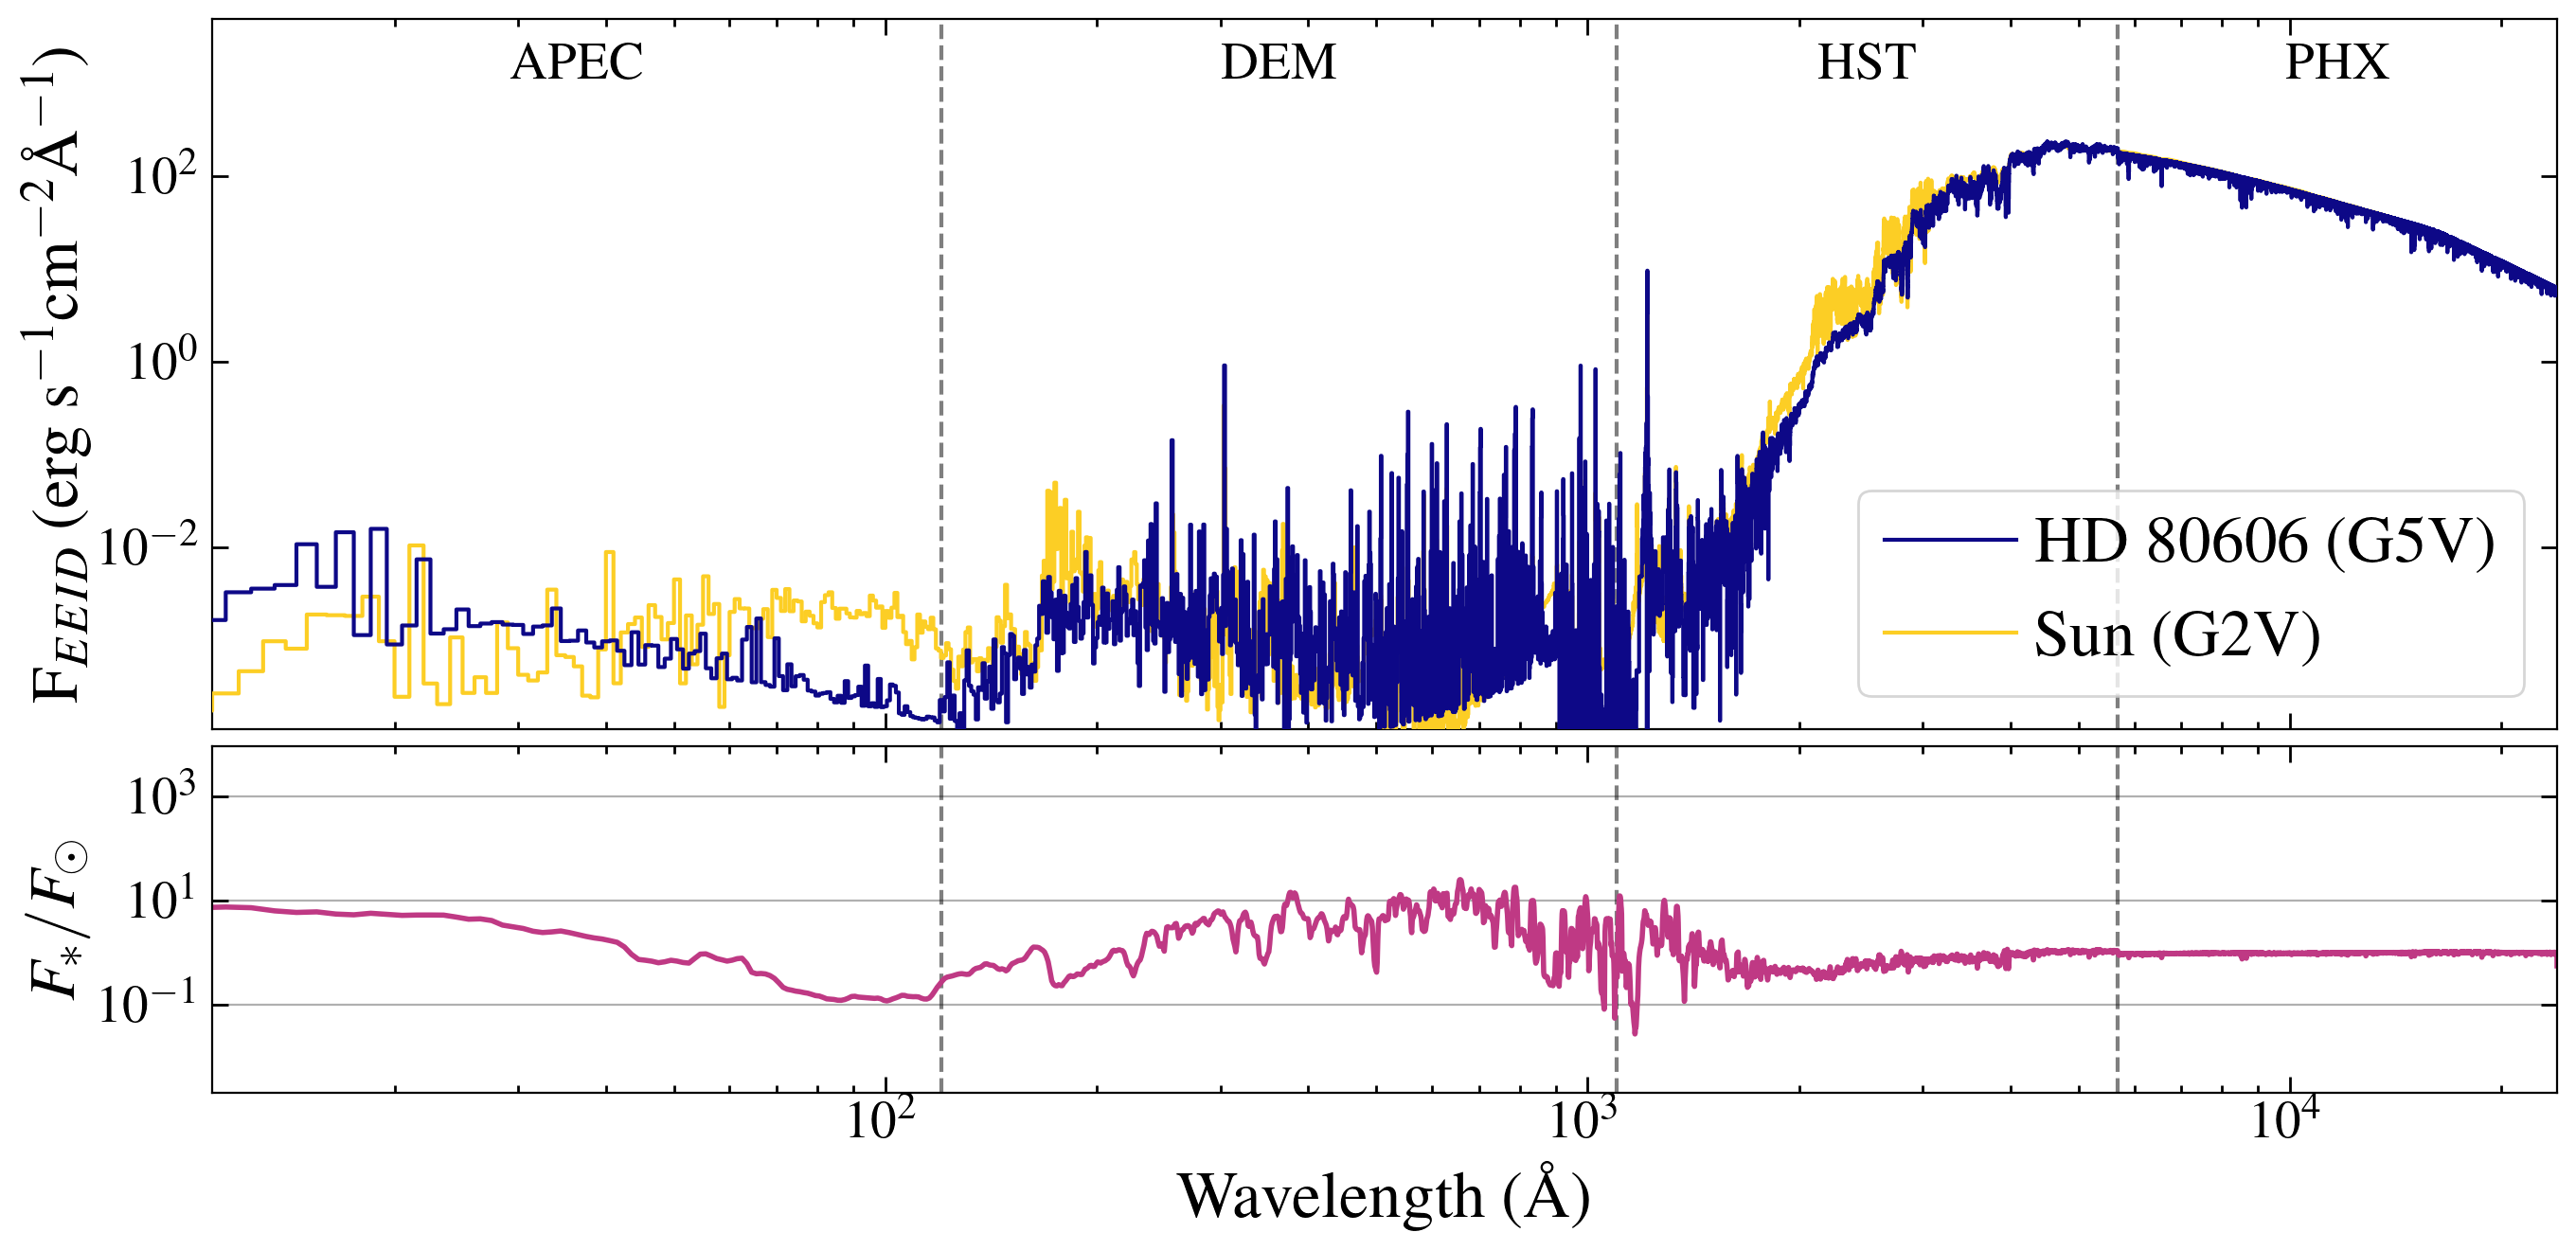

In [47]:

# cols = ['C0', 'C1', 'C2']
cols = [plt.cm.plasma(0),plt.cm.plasma(0.9), plt.cm.plasma(0.45)]

dstar = distance*u.pc
dsun = 1*u.au
lstar = 10**-0.0023662605
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*1*u.au

solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = ((dstar.to(u.m))/(eeidau.to(u.m)))**2

fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1]],figsize=(14, 7), sharex=True)


ax= axes[0]
ax.step(starw, starf*starscale, c=cols[0], label = 'HD 80606 (G5V)', zorder=12, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2V)', zorder=10, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4.9e3)

bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (11, sw[-1])
ax.set_xlim(xlims[0], xlims[1])
divlines = (120, 1100, 5690)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

labels = ['APEC', 'DEM', 'HST', 'PHX']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    ax.annotate(label, (label_x, label_y), ha='center', va='center')



ax.legend(fontsize=25, loc=4,frameon=True)
ax.set_ylabel('F$_{EEID}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
ax1.set_xlabel('Wavelength (\AA)', size=25)
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


mask = (starw> sw[0]) & (starw < sw[-1])
fnew = interp1d(starw[mask], starf[mask], fill_value='extrapolate')(sw)
fnew = fnew*starscale.value
ratio = fnew/sf
ratio = convolve(ratio,Box1DKernel(10))
ax1.plot(sw, ratio, c=cols[2], lw=2)
# ax1.set_ylim(0, 1000)

ax1.set_yscale('log')
ax1.set_ylim(2e-3, 9e3)
ax1.set_ylabel('$F_*/F_{\odot}$', size=25)
# ax1.axhline(1, ls='--', c='k', alpha=0.5)

ax1.grid(axis='y')
fig.tight_layout()
fig.subplots_adjust(hspace=0.05)


plt.savefig('plots/hd_80606_v_sun.pdf')